In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import b_funciones as fn
import joblib
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importar datos
cat = pd.read_csv("Tablas\cat.csv", sep= ',')
num = pd.read_csv("Tablas\ num.csv", sep= ',')
y = pd.read_csv("Tablas\y.csv", sep= ',')

In [3]:
# Borrar columnas inaportantes
cat=cat.drop(['Unnamed: 0'],axis=1)
num=num.drop(['Unnamed: 0'],axis=1)
y=y.drop(['Unnamed: 0'],axis=1)

<h1> Transformaciones

In [4]:
#Convertir variables categoricas a str
cat = cat.astype(str)

# Se transforman las variables categoricas en dummies para separar los niveles de cada una y analizar su influencia
cat = pd.get_dummies(cat)

#Convertir variables categoricas a int para no tener booleanos
cat = cat.astype(int)

cat.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 1   
3                          1                                 0   
4                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   

   Department_Research & Development  Department_Sales  Education_0.0  \
0                                  0                 1              0   
1                                  1                 0              0   
2                                  1                 0              0   
3                                  1                 0              0   
4                                  1                 0              0   

   Education_1.0  Education_2.0  Education_3.0  ...  WorkLifeBalance_4.0  \
0              0              1              0  ...                    0   
1              1              0              0  ...                    1   
2              0              0              0  ...                    0   
3              0              0              0  ...                    0   
4              1              0              0  ...                    0   

   StockOptionLevel_0.0  StockOptionLevel_1.0  StockOptionLevel_2.0  \
0                     1                     0                     0   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     1   

   StockOptionLevel_3.0  resignationReason_Others  resignationReason_Salary  \
0                     0                         1                         0   
1                     0                         1                         0   
2                     1                         1                         0   
3                     1                         1                         0   
4                     0                         1                         0   

   resignationReason_Stress  retirementType_Fired  retirementType_Resignation  
0                         0                     0                           1  
1                         0                     0                           1  
2                         0                     0                           1  
3                         0                     0                           1  
4                         0                     0                           1  

[5 rows x 65 columns]

In [5]:
# Regularización

scaler = MinMaxScaler()
num2 =  scaler.fit_transform(num)
num2 = pd.DataFrame(num2)
num2.columns = num.columns

import joblib  ### para guardar modelos
joblib.dump(scaler, "pkls\scaler.pkl") ##


num=num2

# <h1> VarianceThreshold

In [6]:
# Obtener las varianzas de variables categoricas
variances = cat.var()
variances

BusinessTravel_Non-Travel            0.091288
BusinessTravel_Travel_Frequently     0.152112
BusinessTravel_Travel_Rarely         0.205383
Department_Human Resources           0.040615
Department_Research & Development    0.225712
                                       ...   
resignationReason_Others             0.066924
resignationReason_Salary             0.041030
resignationReason_Stress             0.028402
retirementType_Fired                 0.015625
retirementType_Resignation           0.015625
Length: 65, dtype: float64

In [7]:
#Obtener el promedio de las varianzas para sacar el humbral de VarianceThreshold
promedio_varianzas = variances.mean()
promedio_varianzas

0.1338806748339198

In [8]:
va_cat_m1=fn.selector(0.15,cat)
va_cat_m1.head()

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  Education_2.0  \
0                                  0                 1              1   
1                                  1                 0              0   
2                                  1                 0              0   
3                                  1                 0              0   
4                                  1                 0              0   

   Education_3.0  Education_4.0  EducationField_Life Sciences  \
0              0              0                             1   
1              0              0                             1   
2              0              1                             0   
3              0              0                             1   
4              0              0                             0   

   EducationField_Medical  Gender_Female  ...  EnvironmentSatisfaction_3.0  \
0                       0              1  ...                            1   
1                       0              1  ...                            1   
2                       0              0  ...                            0   
3                       0              0  ...                            0   
4                       1              0  ...                            0   

   EnvironmentSatisfaction_4.0  JobSatisfaction_1.0  JobSatisfaction_2.0  \
0                            0                    0                    0   
1                            0                    0                    1   
2                            0                    0                    1   
3                            1                    0                    0   
4                            1                    1                    0   

   JobSatisfaction_3.0  JobSatisfaction_4.0  WorkLifeBalance_2.0  \
0                    0                    1                    1   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    1                    0   
4                    0                    0                    0   

   WorkLifeBalance_3.0  StockOptionLevel_0.0  StockOptionLevel_1.0  
0                    0                     1                     0  
1                    0                     0                     1  
2                    0                     0                     0  
3                    1                     0                     0  
4                    1                     0                     0  

[5 rows x 32 columns]

In [9]:
# Obtener las varianzas de variables numericas
variances = num.var()
variances

Age                        0.025435
DistanceFromHome           0.078257
MonthlyIncome              0.055880
NumCompaniesWorked         0.076575
PercentSalaryHike          0.023668
TotalWorkingYears          0.038148
TrainingTimesLastYear      0.047261
YearsAtCompany             0.023525
YearsSinceLastPromotion    0.046066
YearsWithCurrManager       0.044184
mean_time                  0.069605
dtype: float64

In [10]:
#Obtener el promedio de las varianzas para sacar el umbral de VarianceThreshold
promedio_varianzas = variances.mean()
promedio_varianzas

0.04805502396216261

In [11]:
# Selección de variables mediante VarianceThreshold
va_num_m1=fn.selector(0.05,num)

va_num_m1.head()

DistanceFromHome  MonthlyIncome  NumCompaniesWorked  mean_time
0          0.206897       0.655833            0.111111   0.279528
1          0.344828       0.209460            0.000000   0.348425
2          0.586207       0.966448            0.111111   0.208661
3          0.068966       0.416071            0.333333   0.244094
4          0.344828       0.117106            0.444444   0.405512

In [12]:
#Se juntan las variables independientes modelo 1
cat_m1=va_num_m1.reset_index()
num_m1=va_cat_m1.reset_index()
X_m1=pd.merge(cat_m1, num_m1, how = 'inner', on = 'index')
X_m1.drop('index',axis=1,inplace=True)

In [13]:
X_m1.head()

DistanceFromHome  MonthlyIncome  NumCompaniesWorked  mean_time  \
0          0.206897       0.655833            0.111111   0.279528   
1          0.344828       0.209460            0.000000   0.348425   
2          0.586207       0.966448            0.111111   0.208661   
3          0.068966       0.416071            0.333333   0.244094   
4          0.344828       0.117106            0.444444   0.405512   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             1   

   Department_Research & Development  Department_Sales  Education_2.0  \
0                                  0                 1              1   
1                                  1                 0              0   
2                                  1                 0              0   
3                                  1                 0              0   
4                                  1                 0              0   

   Education_3.0  ...  EnvironmentSatisfaction_3.0  \
0              0  ...                            1   
1              0  ...                            1   
2              0  ...                            0   
3              0  ...                            0   
4              0  ...                            0   

   EnvironmentSatisfaction_4.0  JobSatisfaction_1.0  JobSatisfaction_2.0  \
0                            0                    0                    0   
1                            0                    0                    1   
2                            0                    0                    1   
3                            1                    0                    0   
4                            1                    1                    0   

   JobSatisfaction_3.0  JobSatisfaction_4.0  WorkLifeBalance_2.0  \
0                    0                    1                    1   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    1                    0   
4                    0                    0                    0   

   WorkLifeBalance_3.0  StockOptionLevel_0.0  StockOptionLevel_1.0  
0                    0                     1                     0  
1                    0                     0                     1  
2                    0                     0                     0  
3                    1                     0                     0  
4                    1                     0                     0  

[5 rows x 36 columns]

# <h1> Matrices de correlacion

In [14]:
# Se define la variable target
df_dea2 = cat
df_dea2['target'] = y

Se seleccionaron las variables que estuvieran por encima de 0.07 ya que fueron las que consideramos que podían aportar más al modelo. Las variables que tenian una correlación más fuerte con la variable target se muestran a continuación:

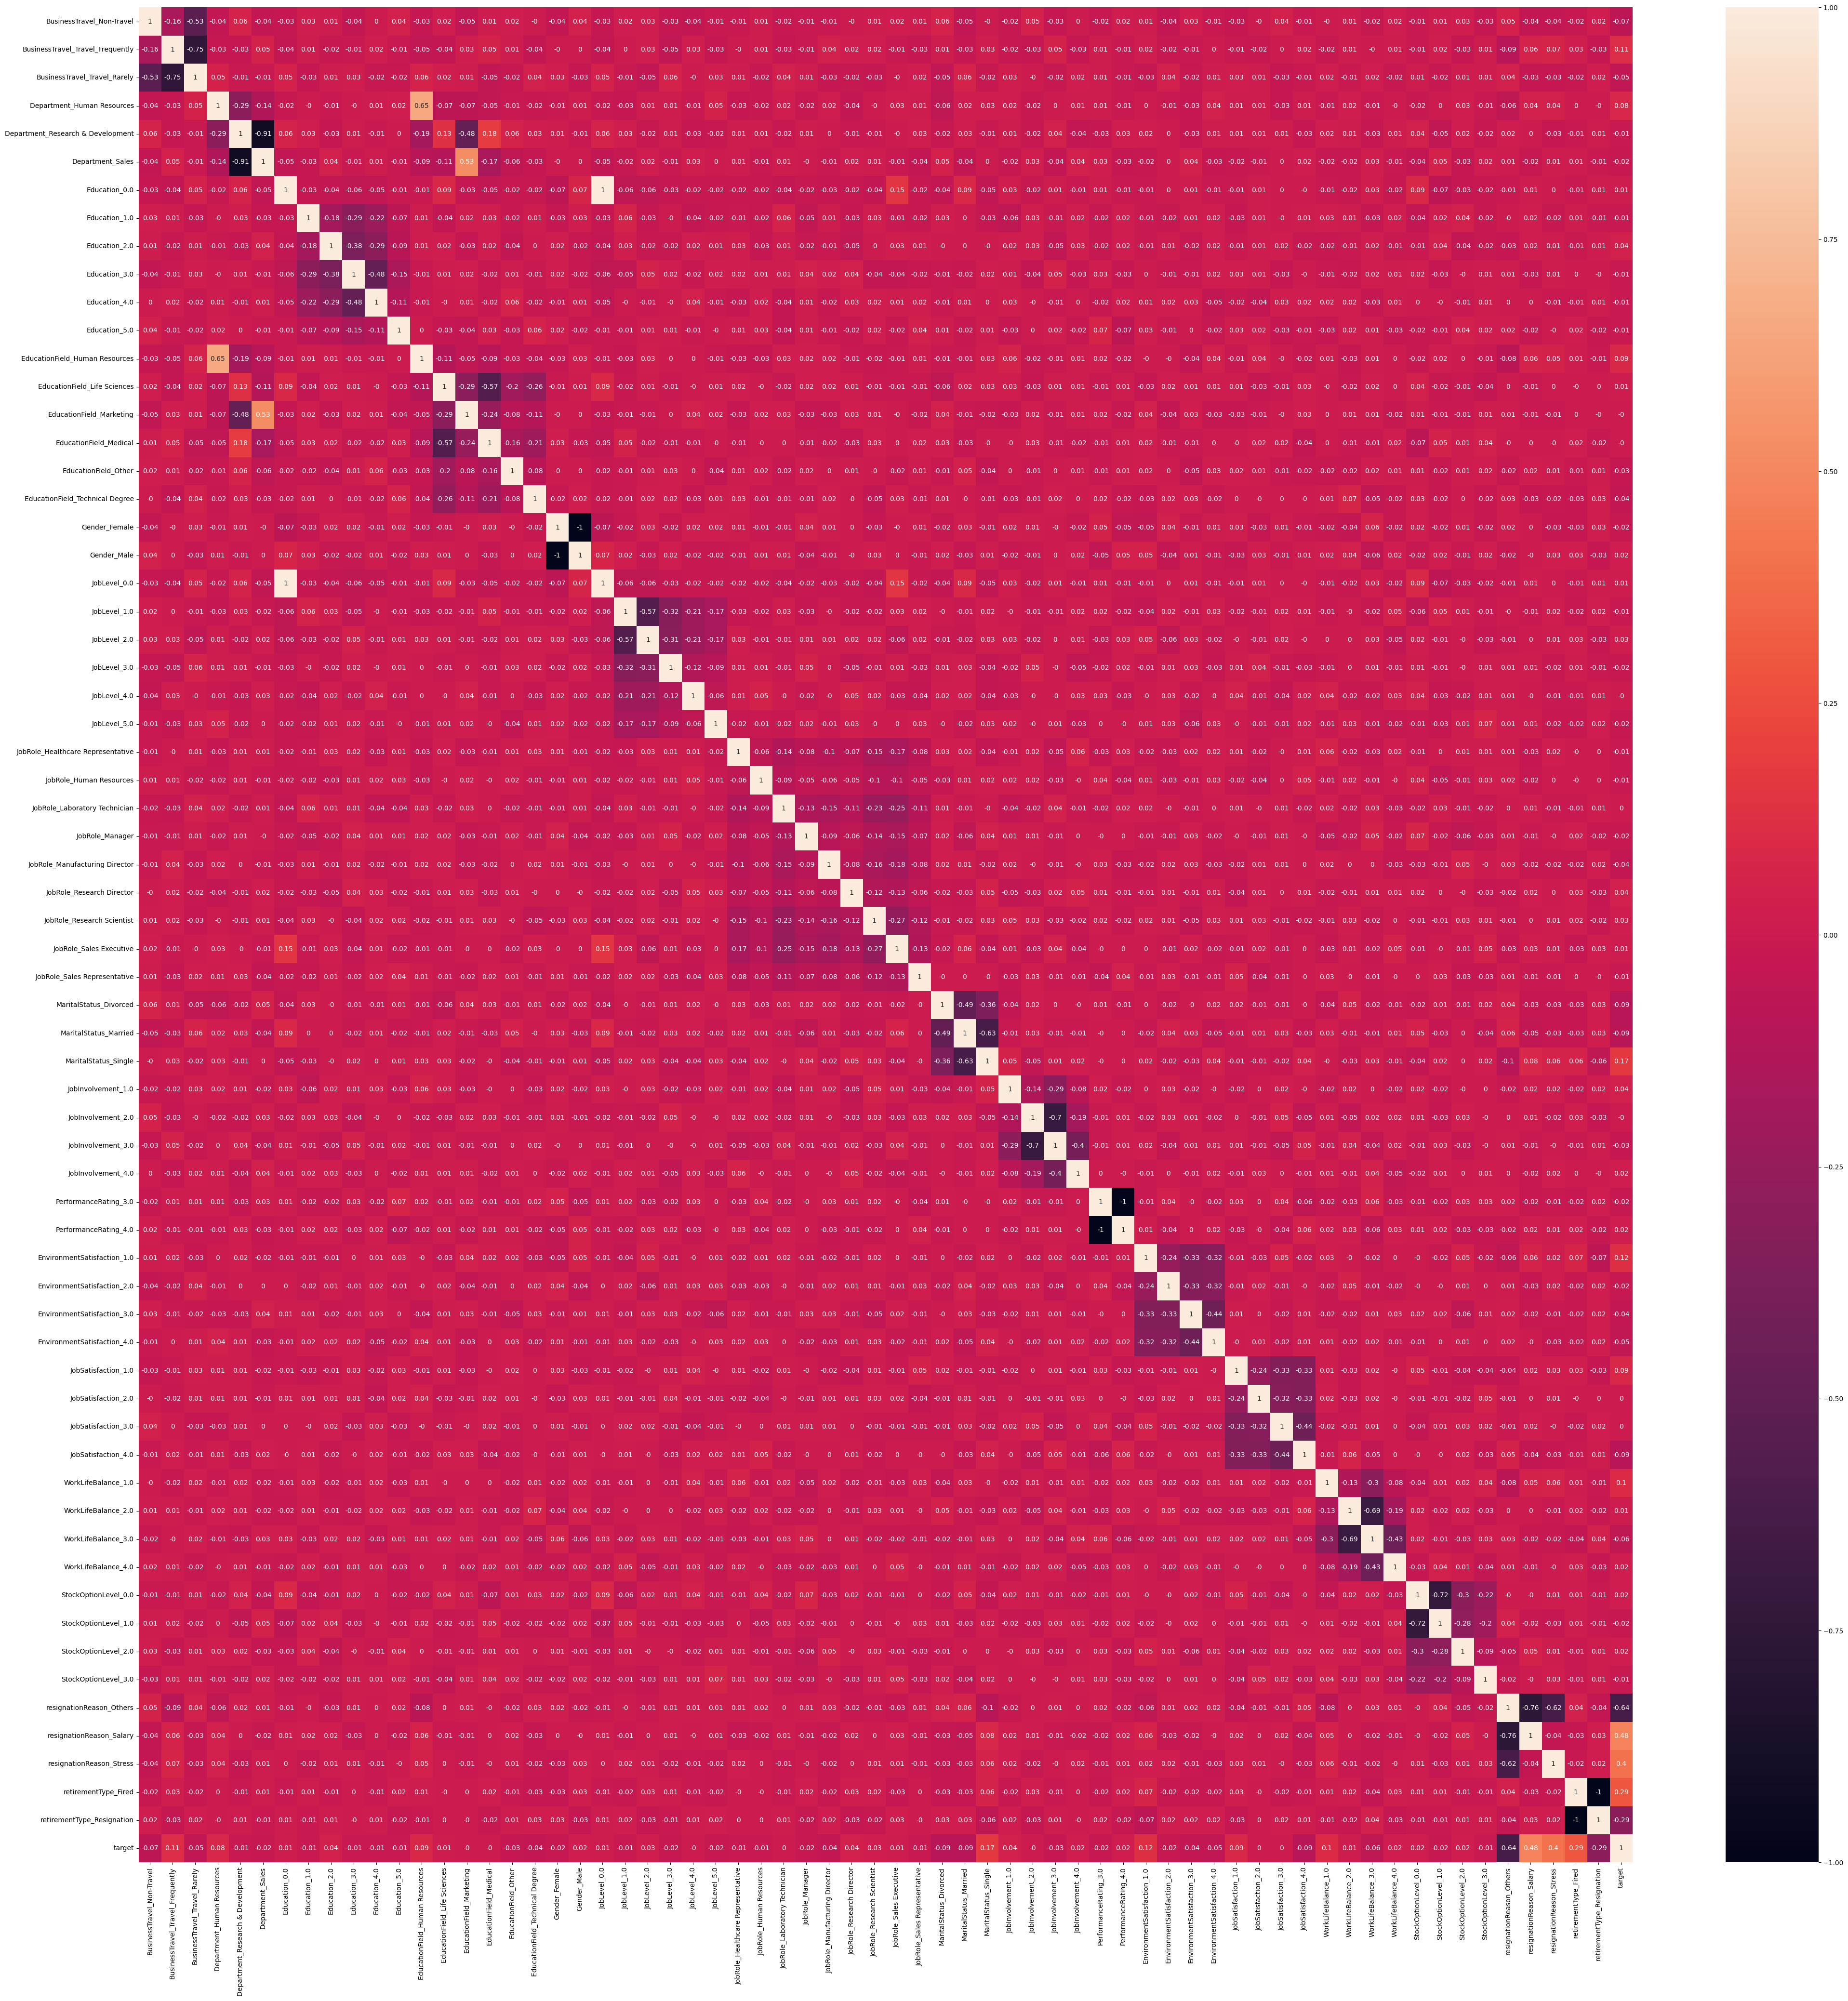

In [15]:
# Se realiza la matriz de correlación para analizar la dependencia de la variable target con las demás
plt.figure(figsize=(50,50))
sns.heatmap(round(df_dea2.corr(),2), annot=True)
plt.show()

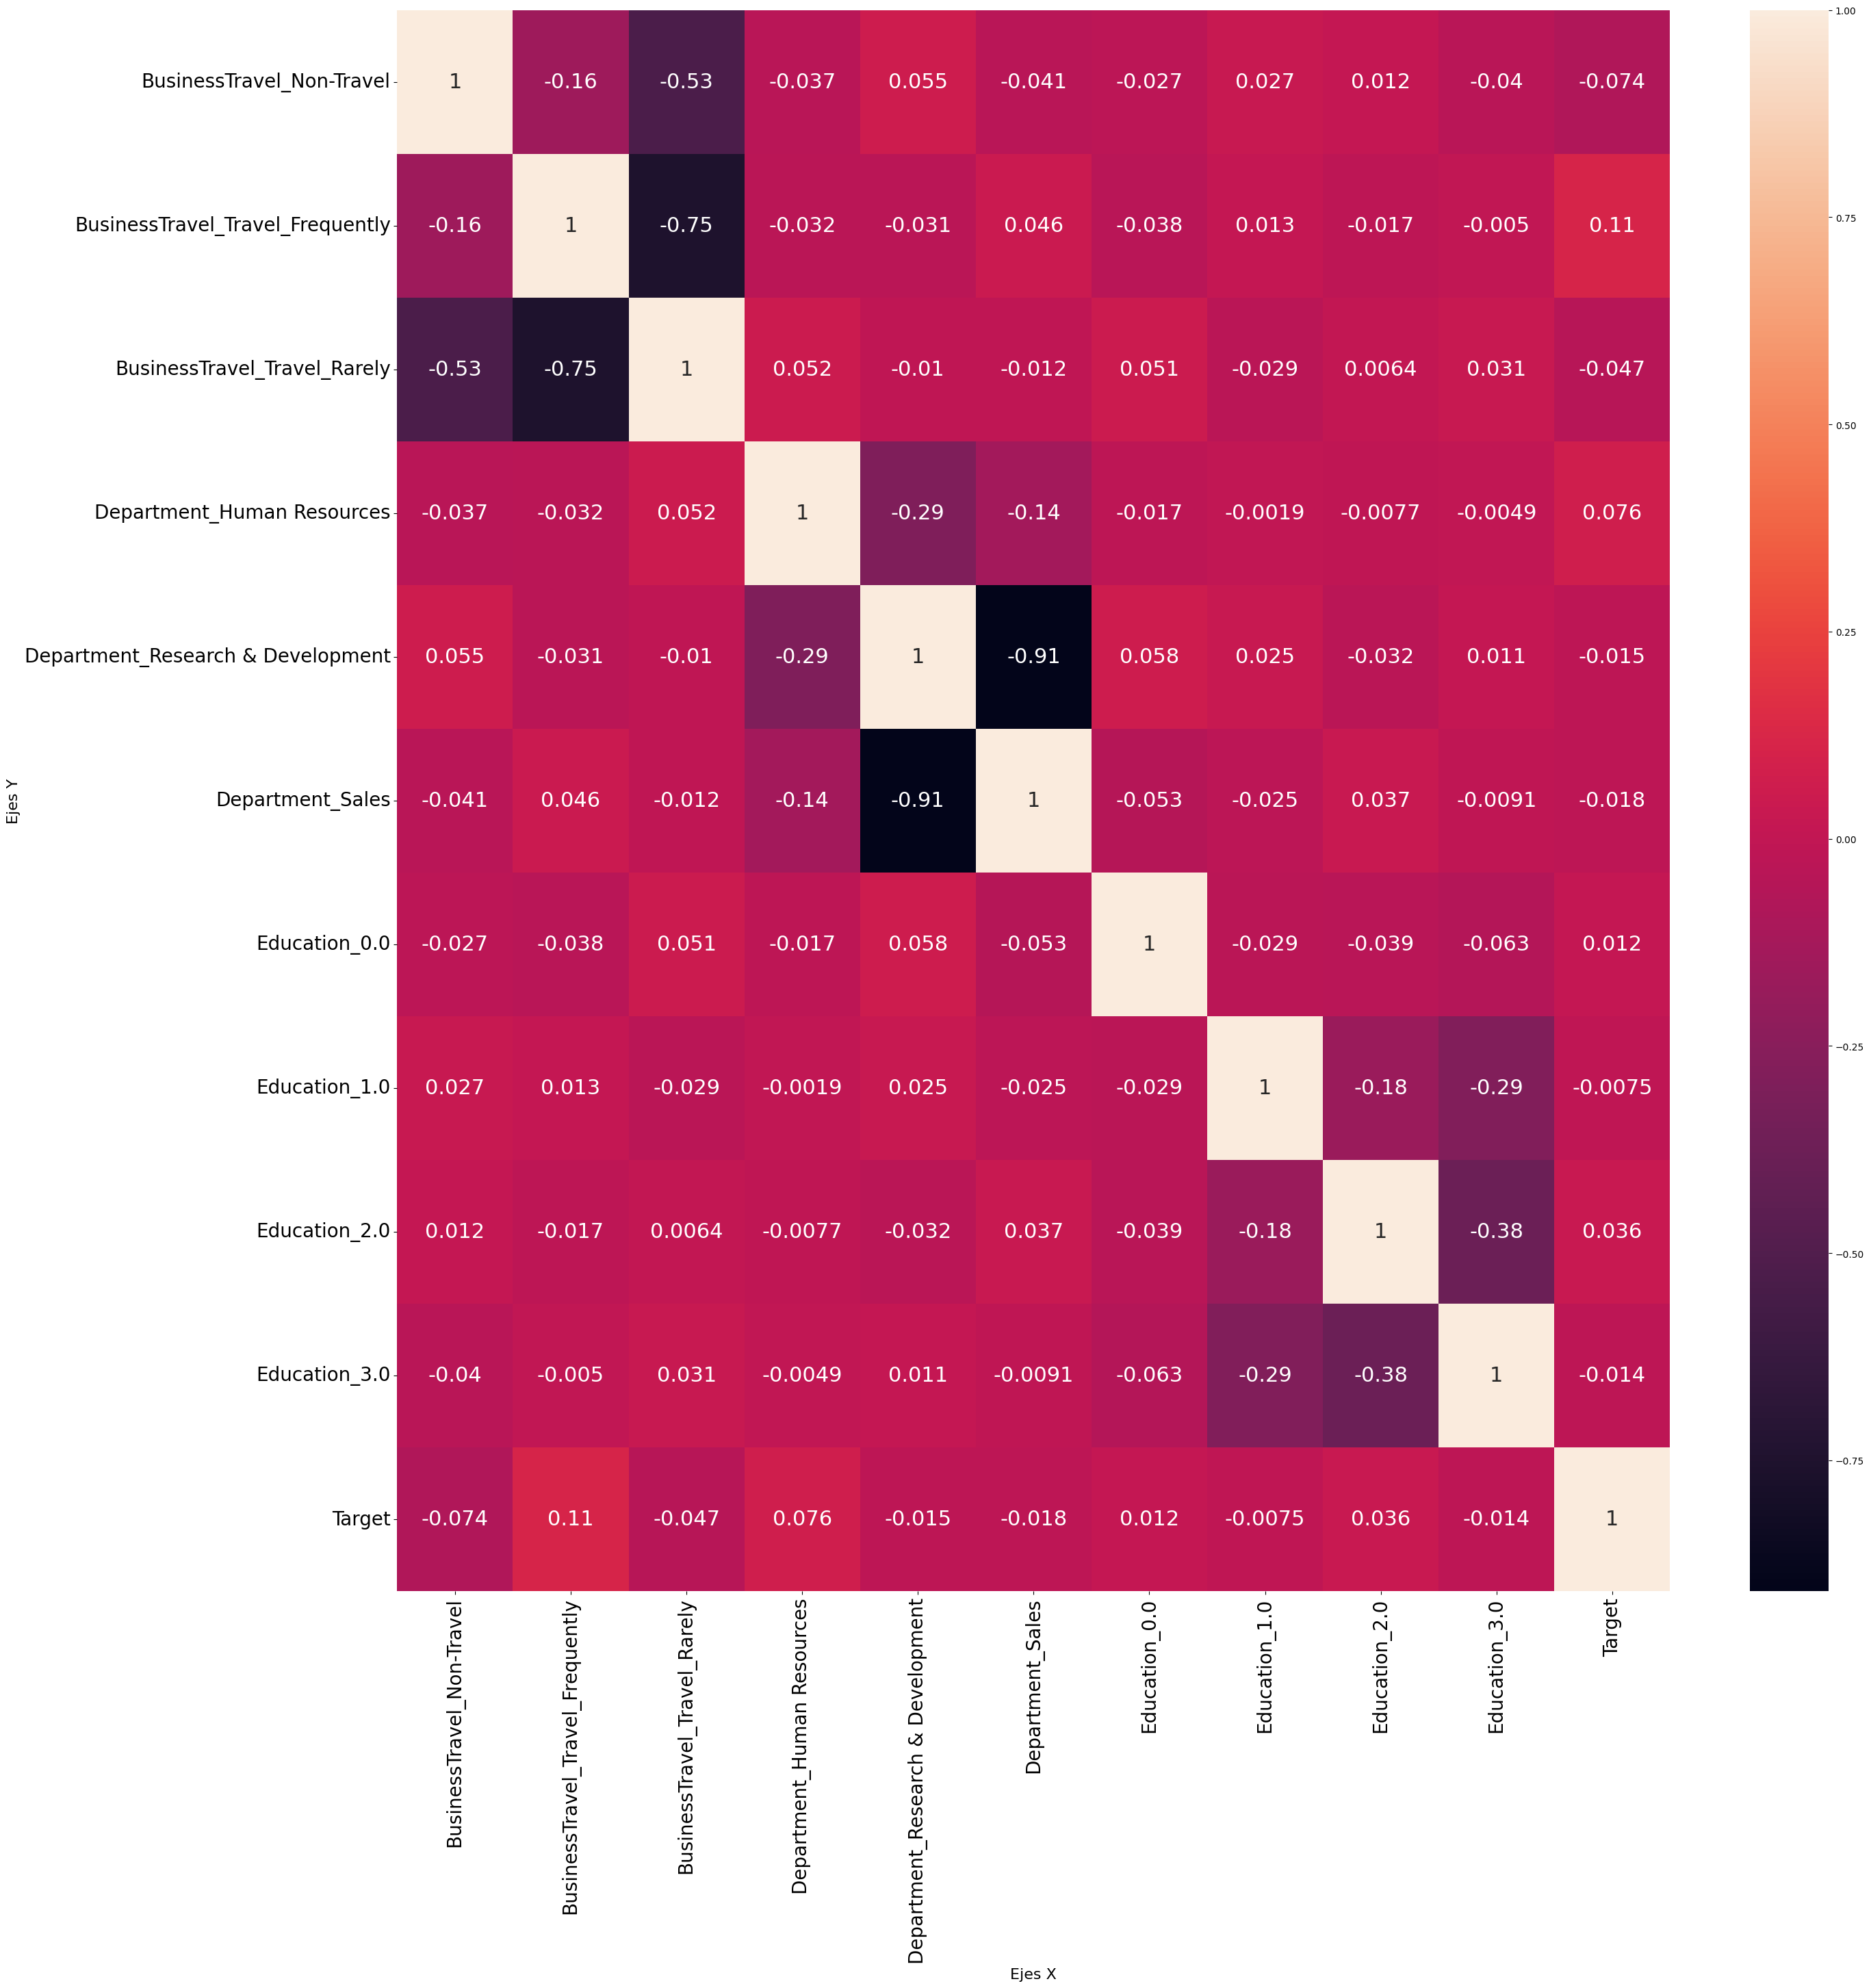

In [16]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:, 0:10]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

In [17]:
mc_cat=cat[['JobSatisfaction_4.0', 'WorkLifeBalance_1.0','EnvironmentSatisfaction_1.0','JobSatisfaction_2.0','JobRole_Sales Executive','MaritalStatus_Divorced','MaritalStatus_Single','EducationField_Human Resources','BusinessTravel_Travel_Frequently','Department_Human Resources','BusinessTravel_Non-Travel']]

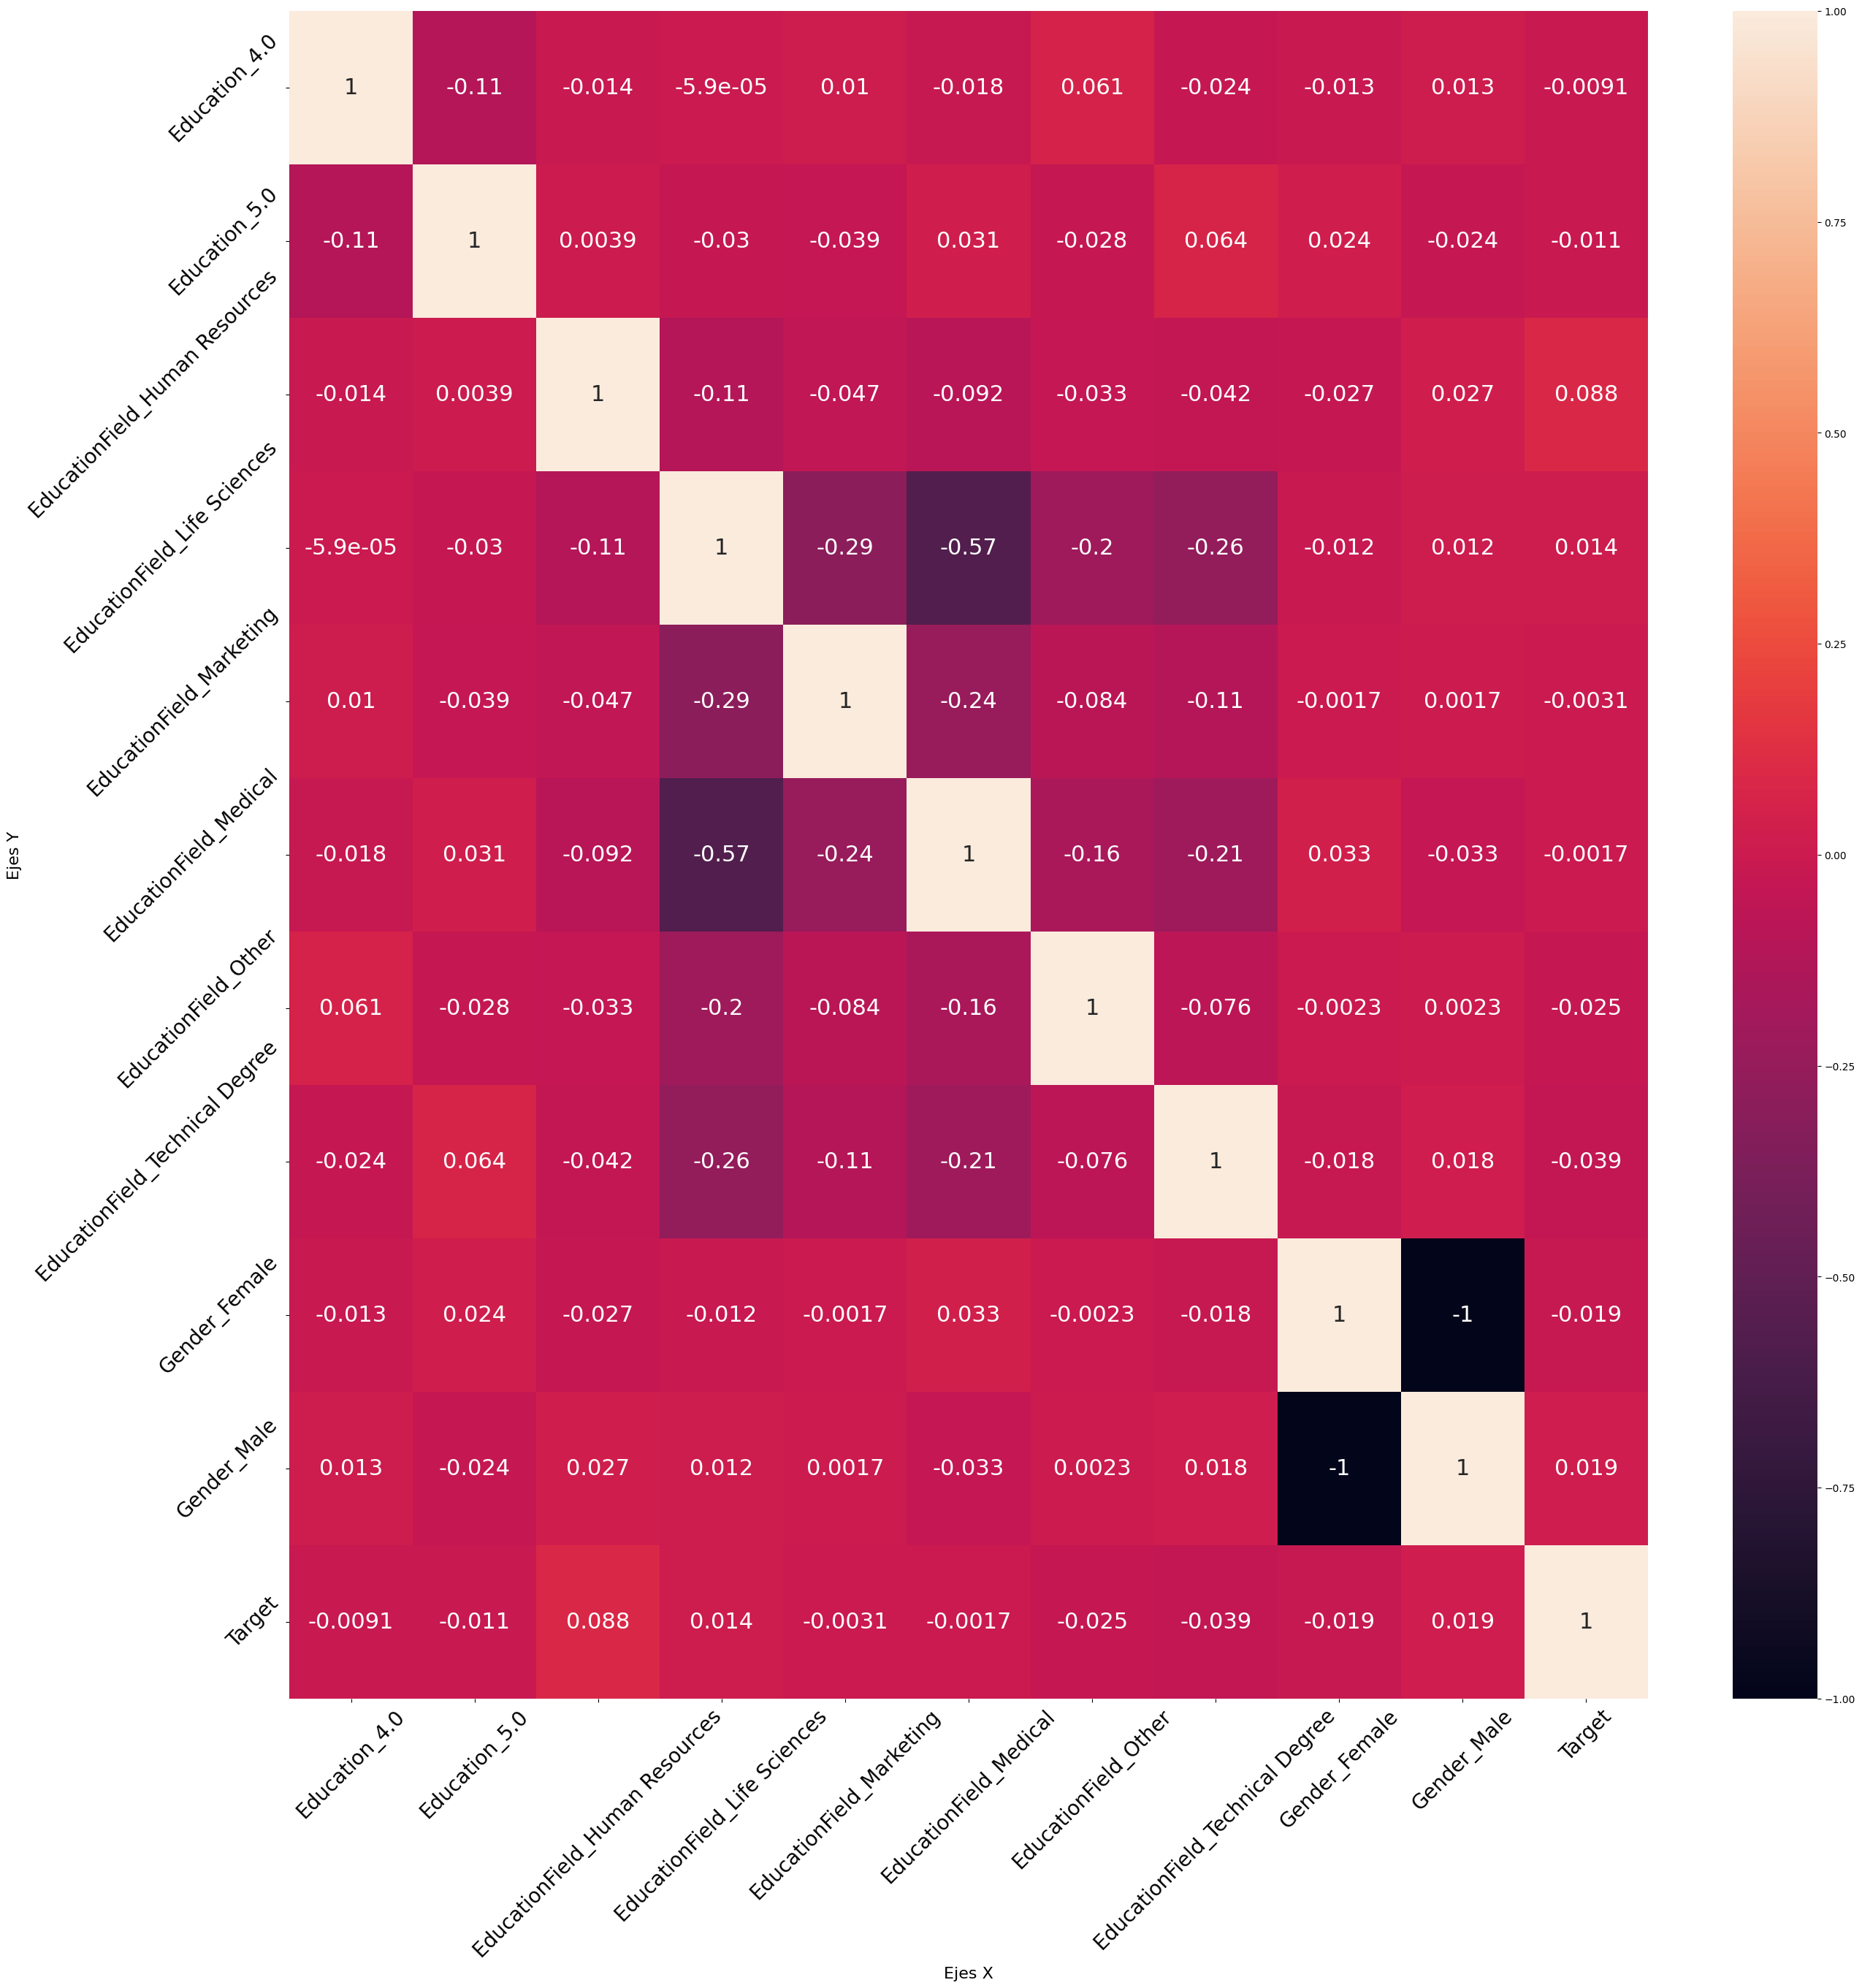

In [18]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,10:20]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

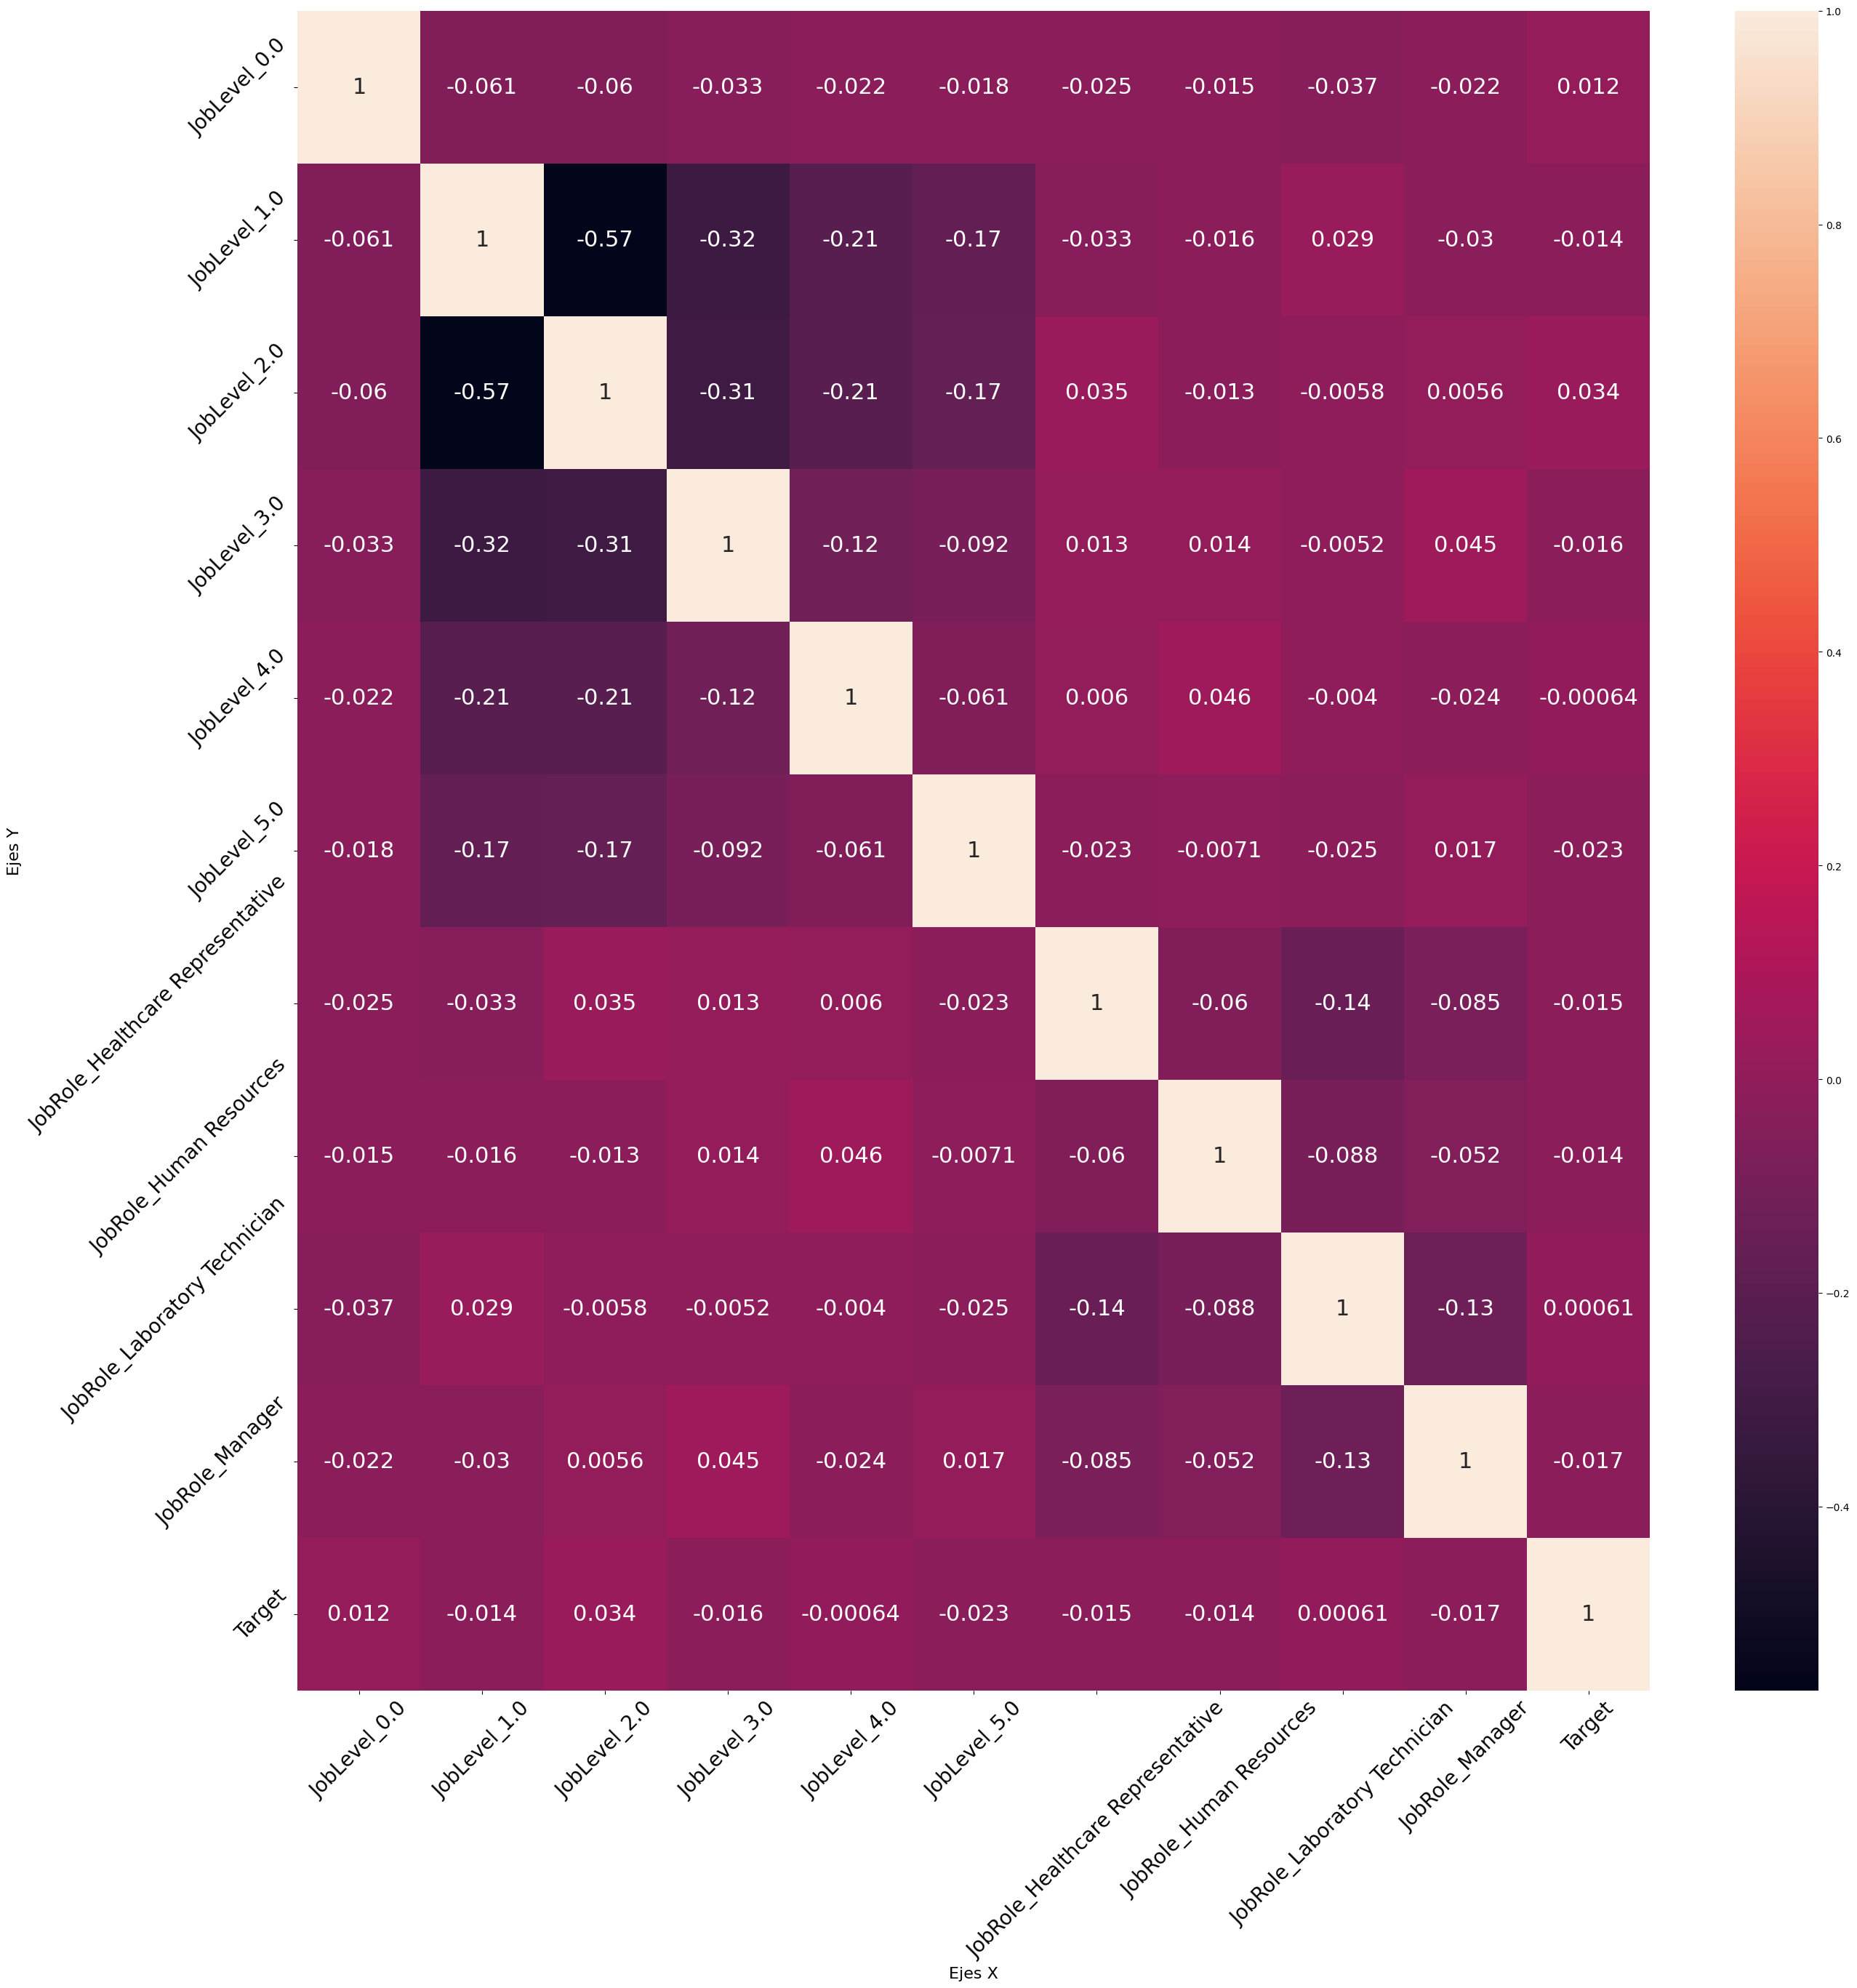

In [19]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,20:30]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

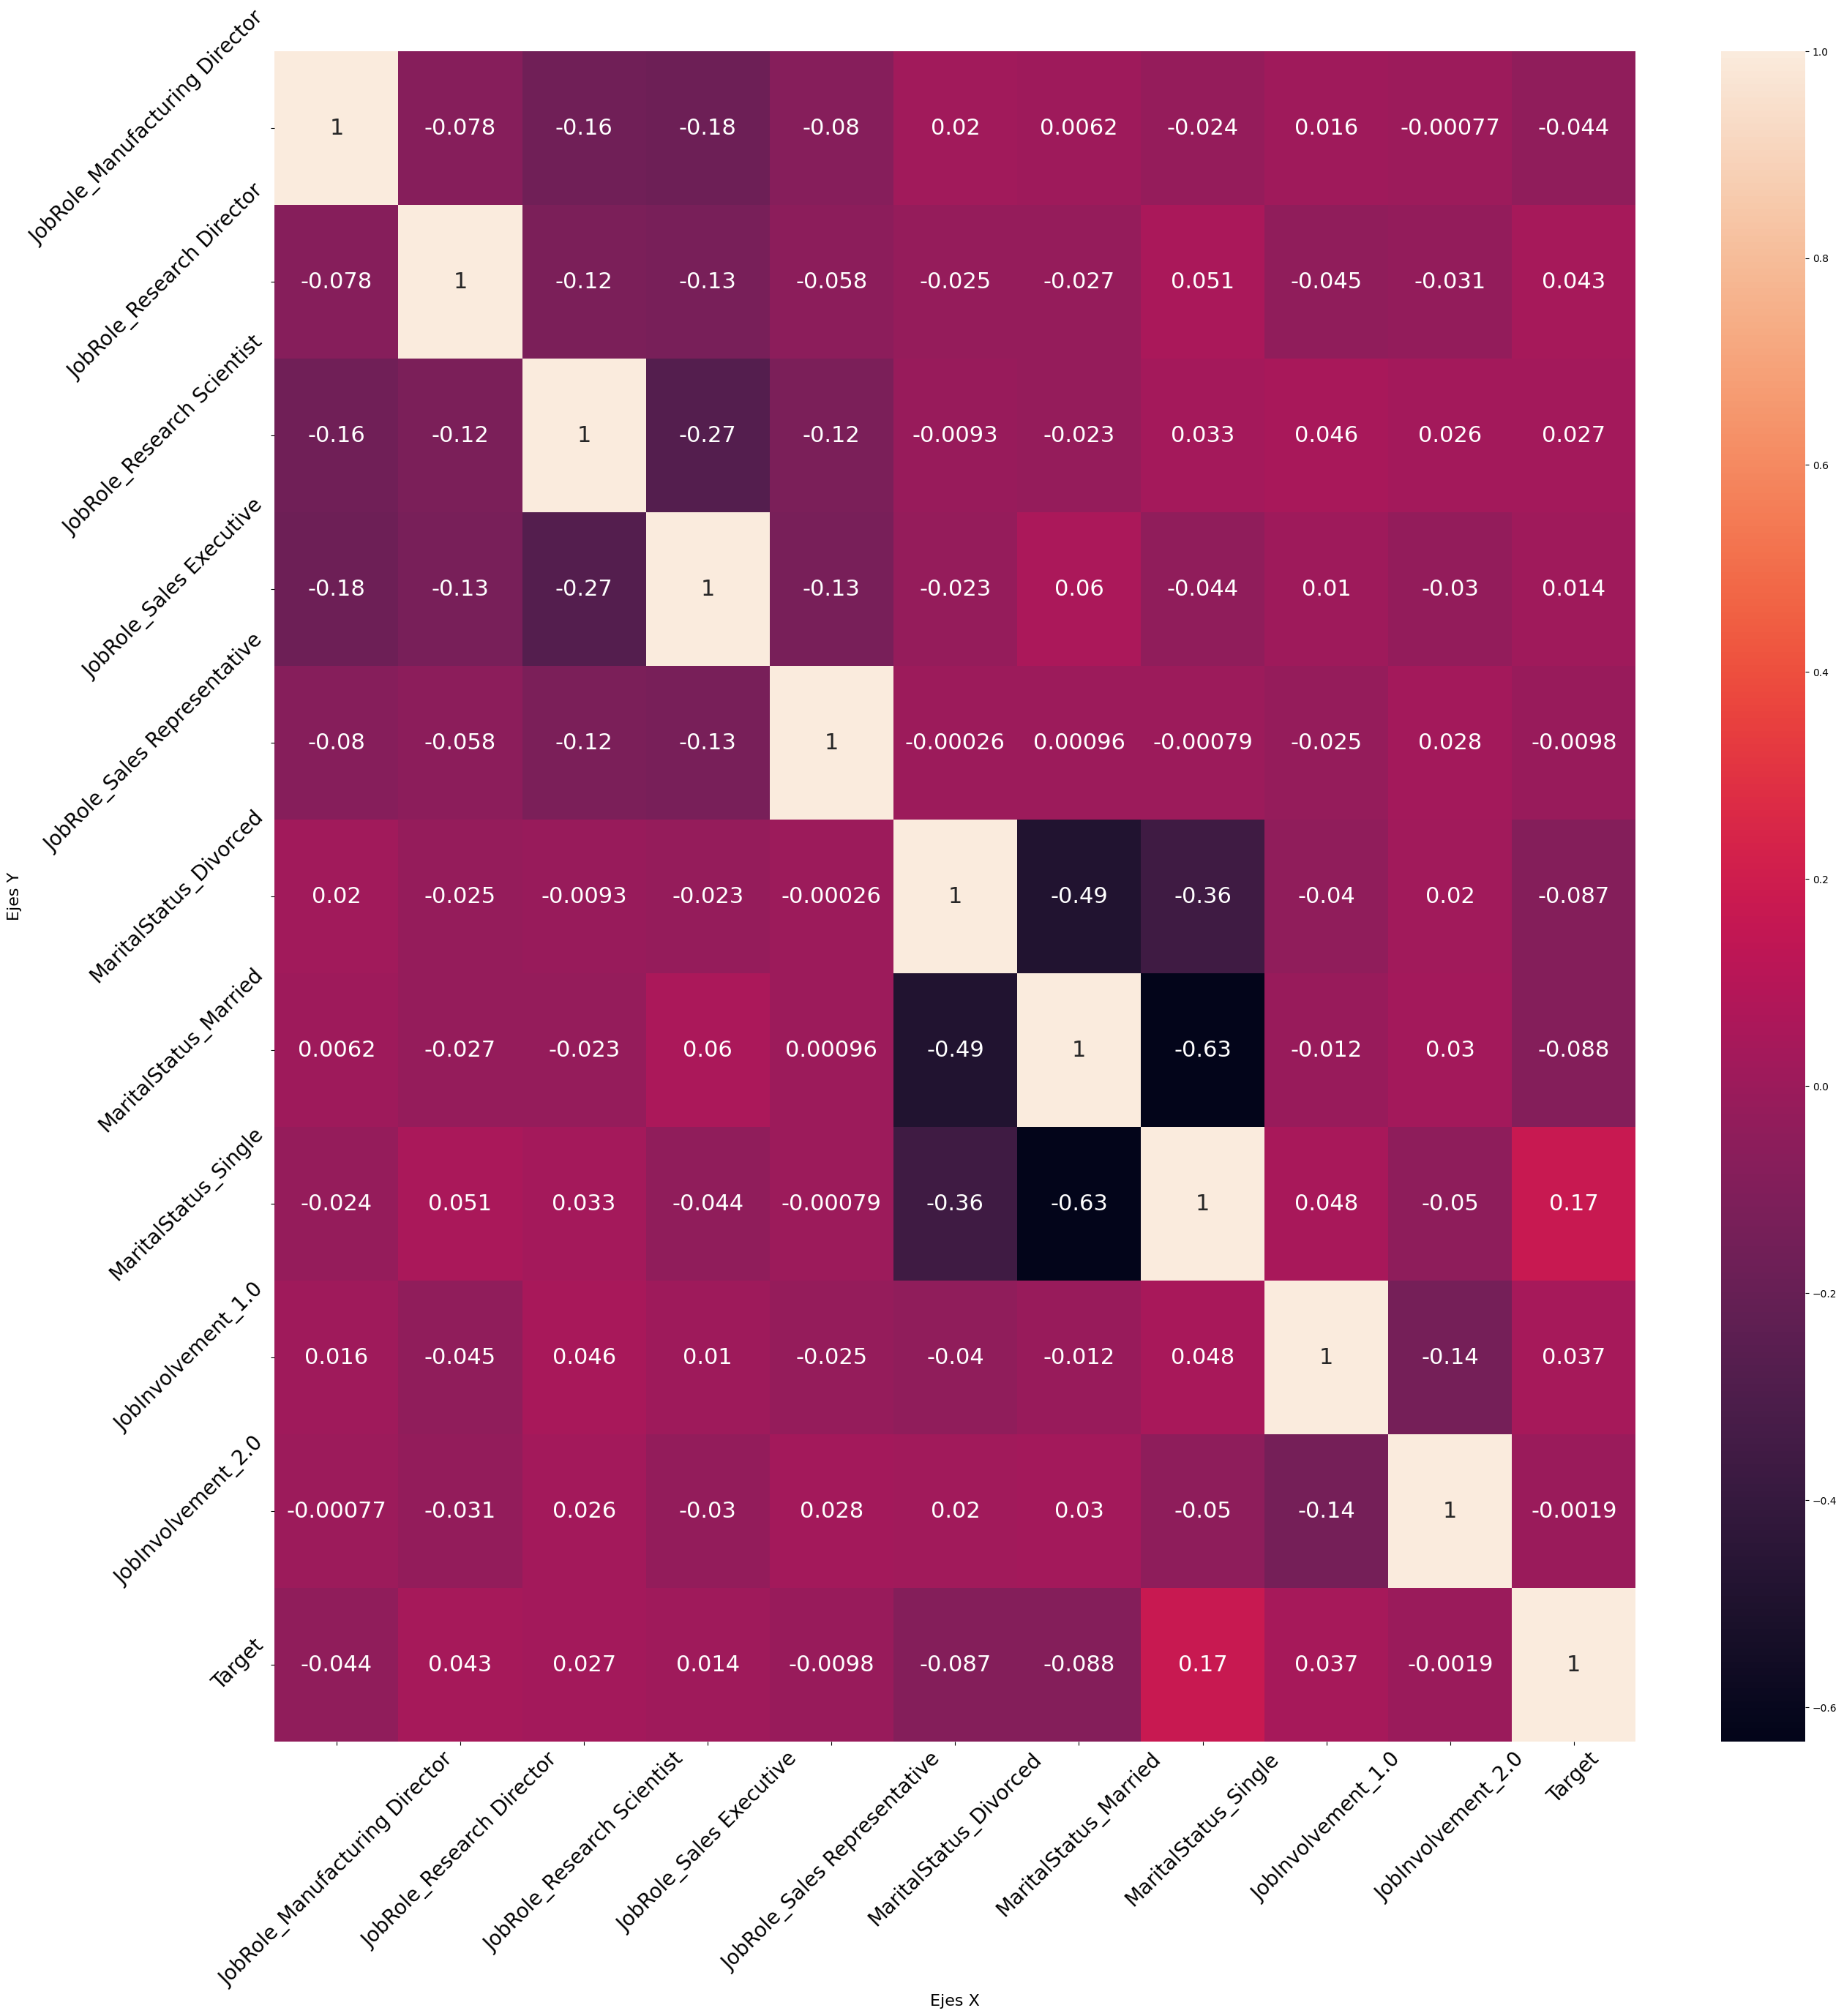

In [20]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,30:40]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

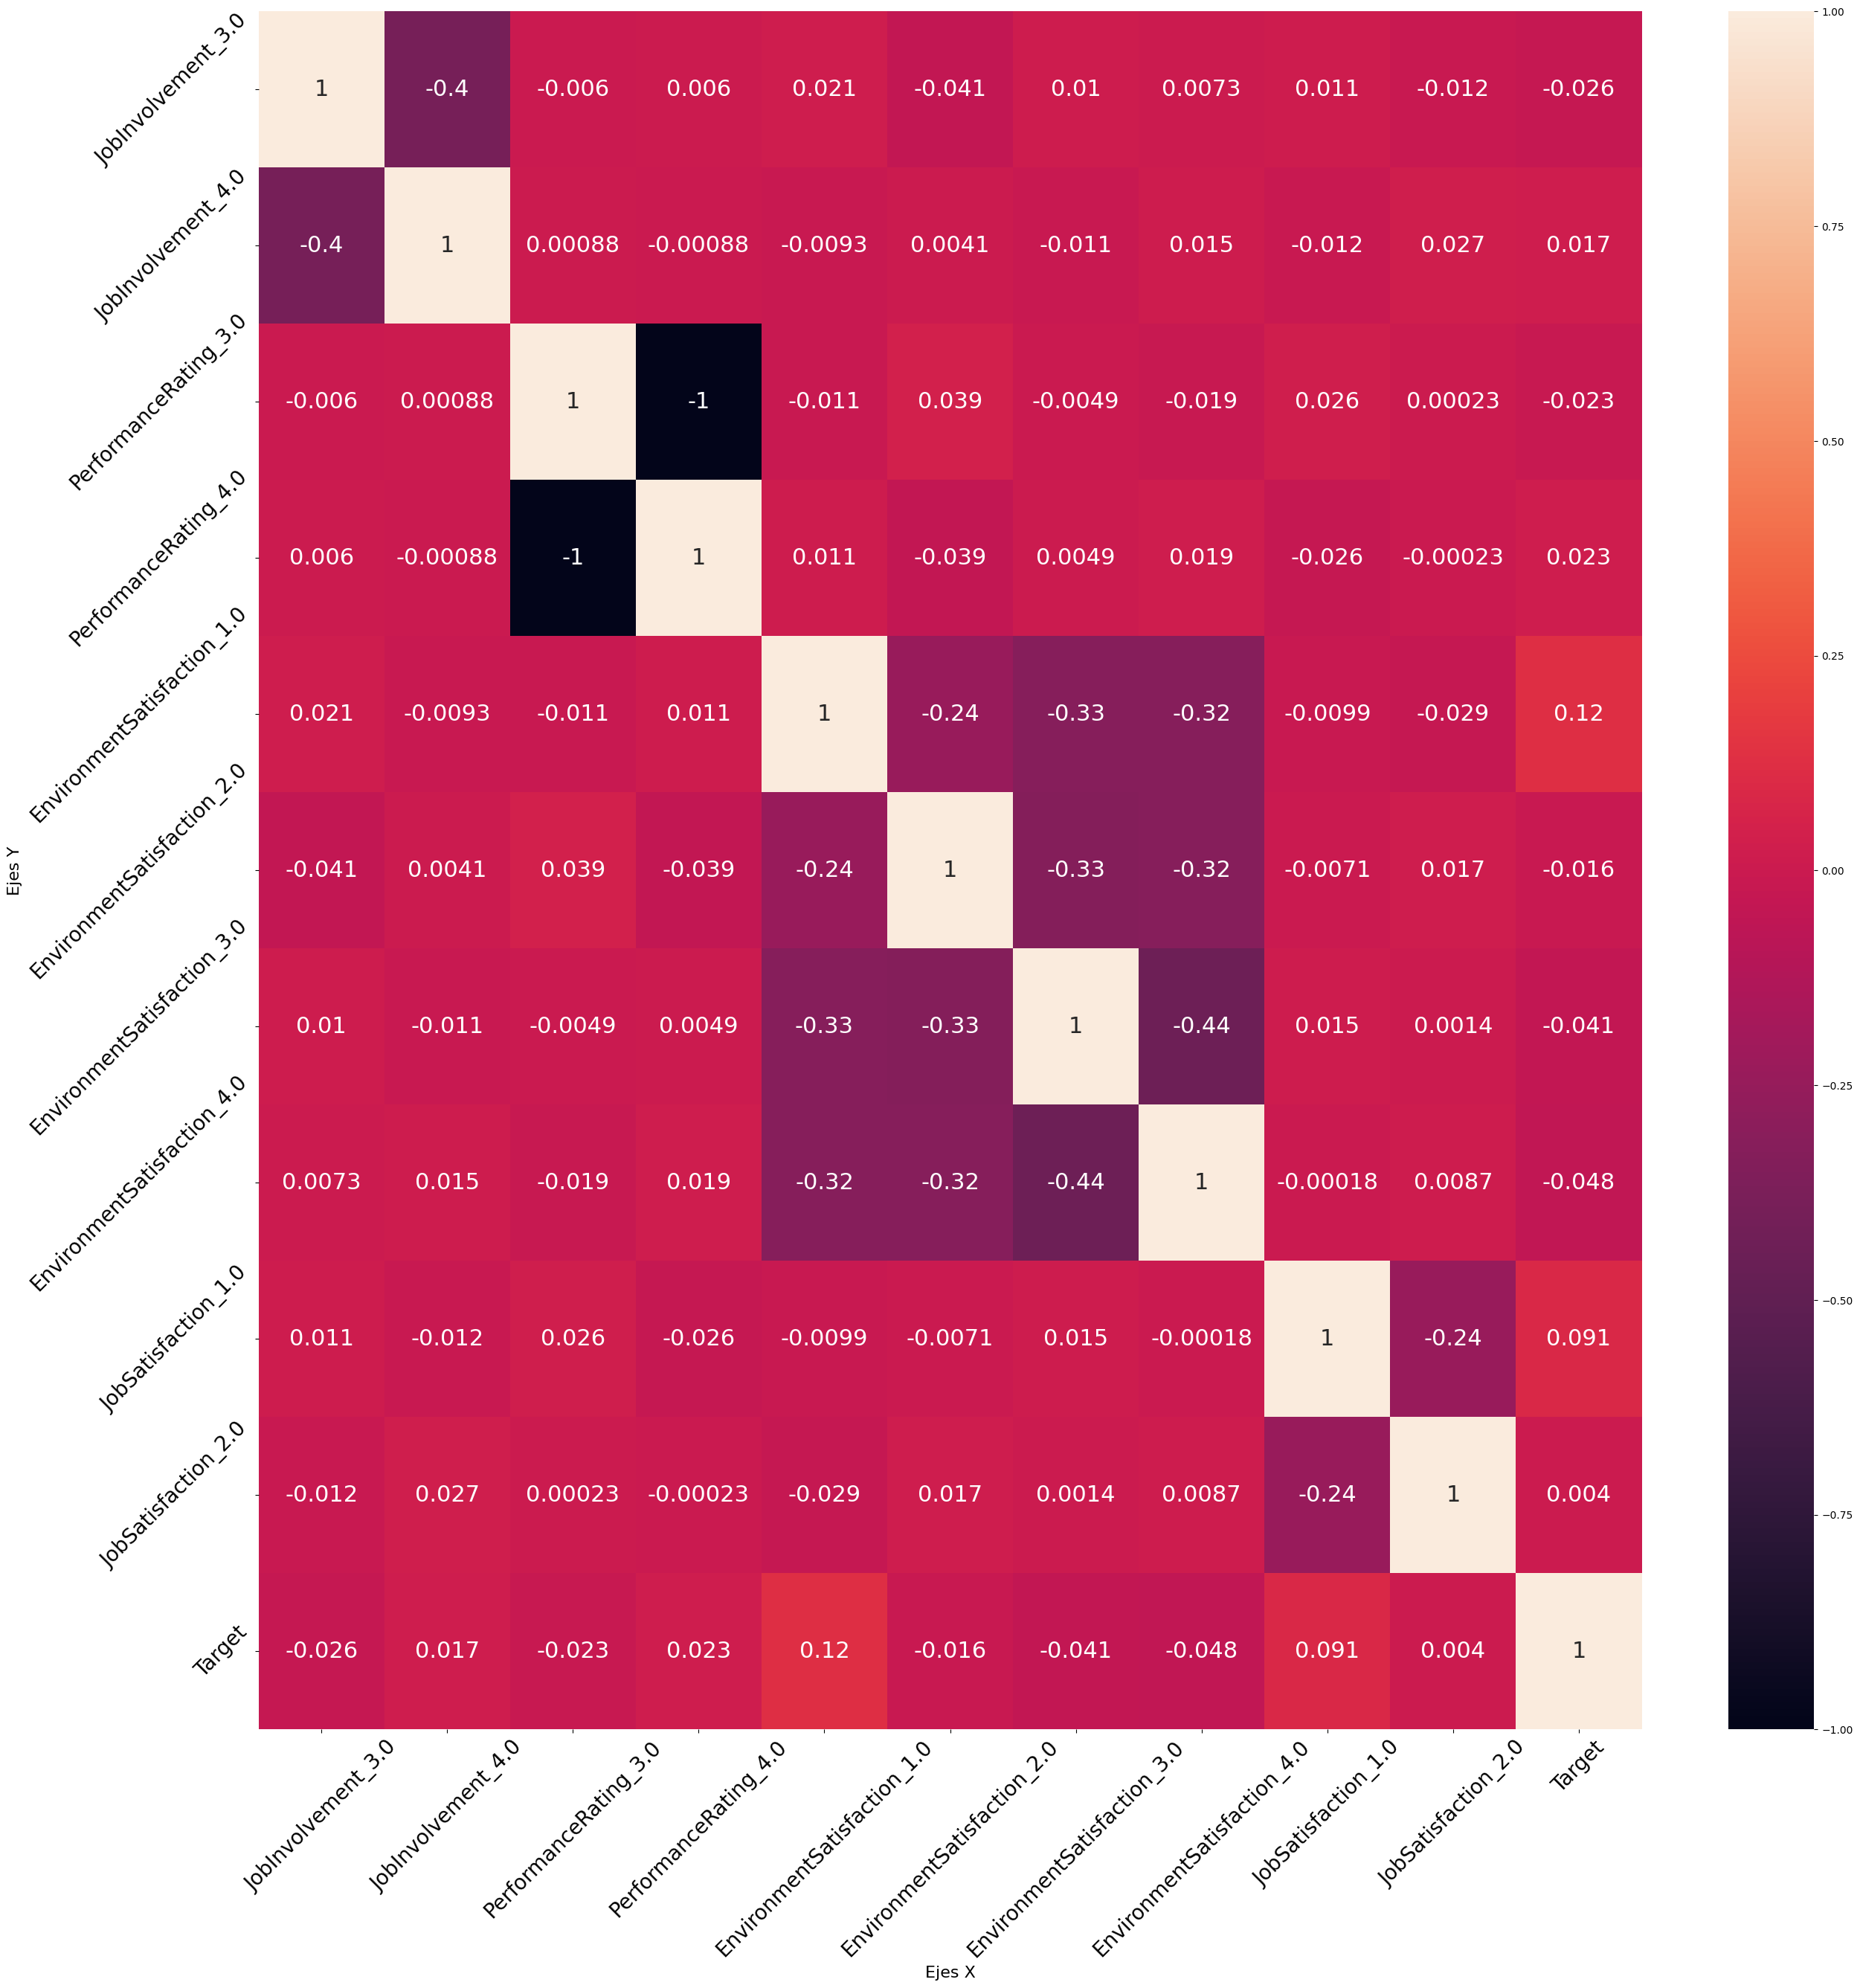

In [21]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,40:50]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

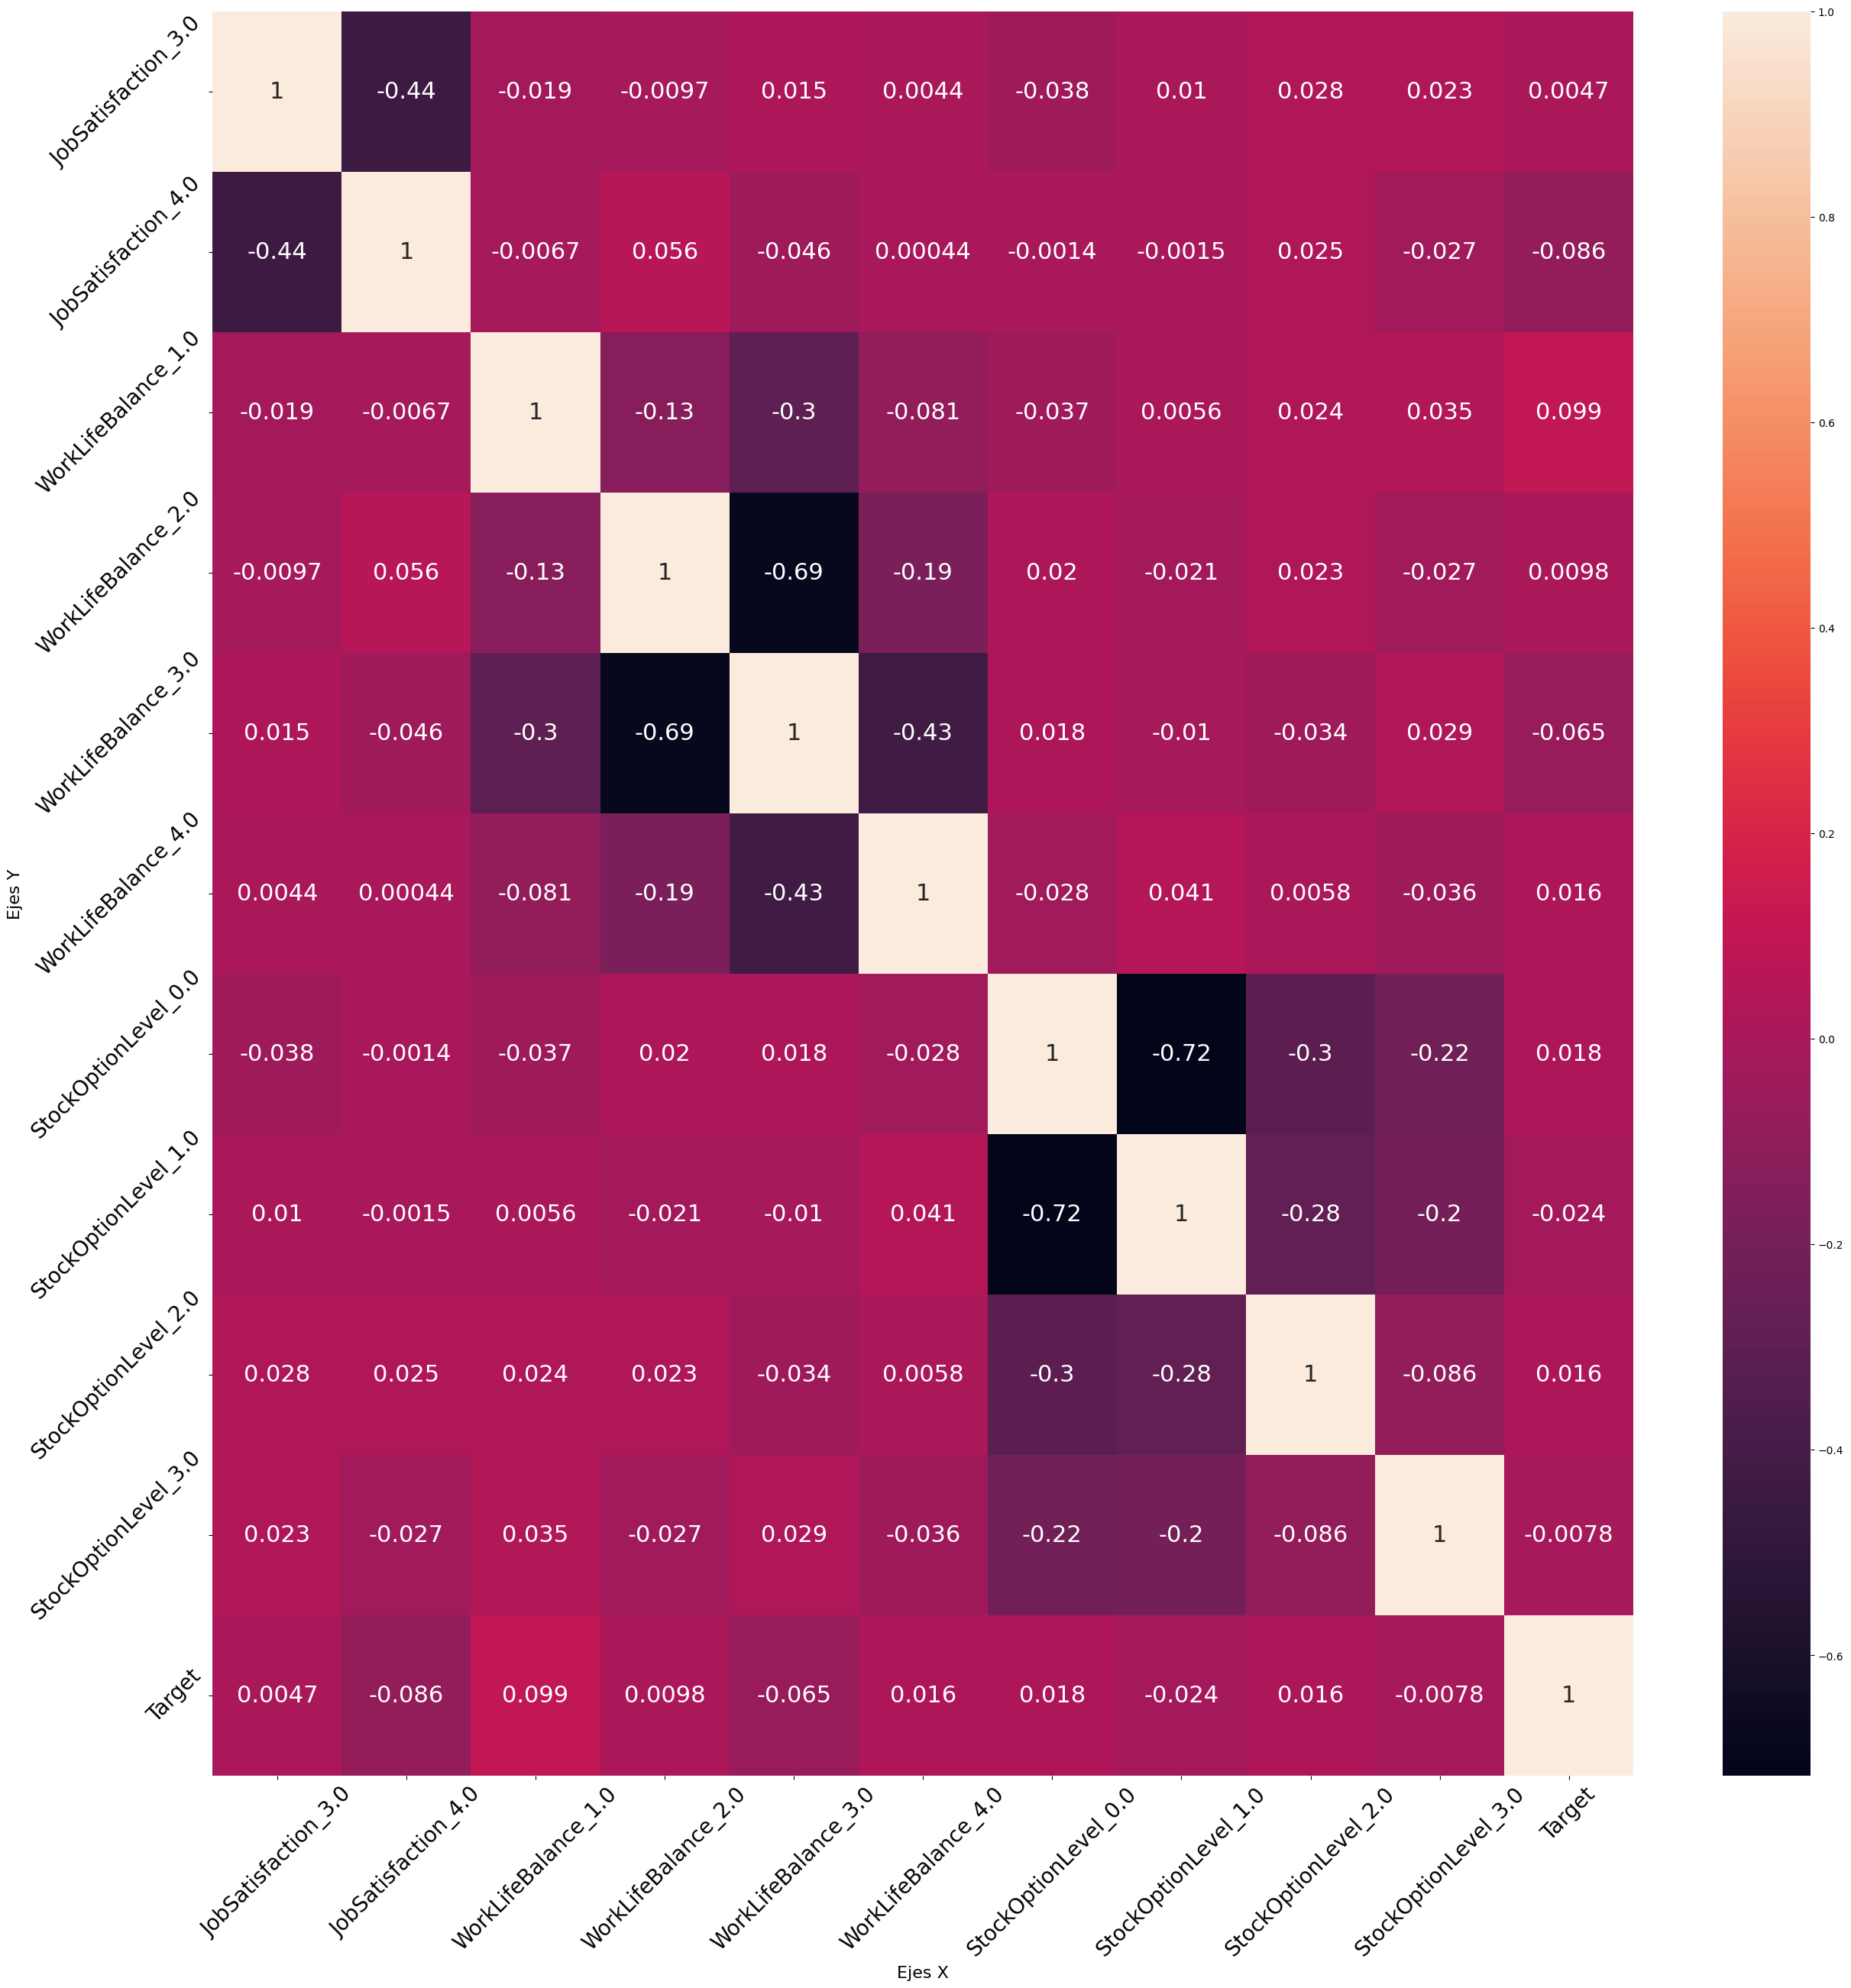

In [22]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,50:60]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)  # Rotar 45 grados y ajustar el tamaño de letra
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)

plt.show()

Se seleccionaron las variables que estuvieran por encima de 0.1 ya que fueron las que consideramos que podían aportar más al modelo. Las variables que tenian una correlación más fuerte con la variable target se muestran a continuación:

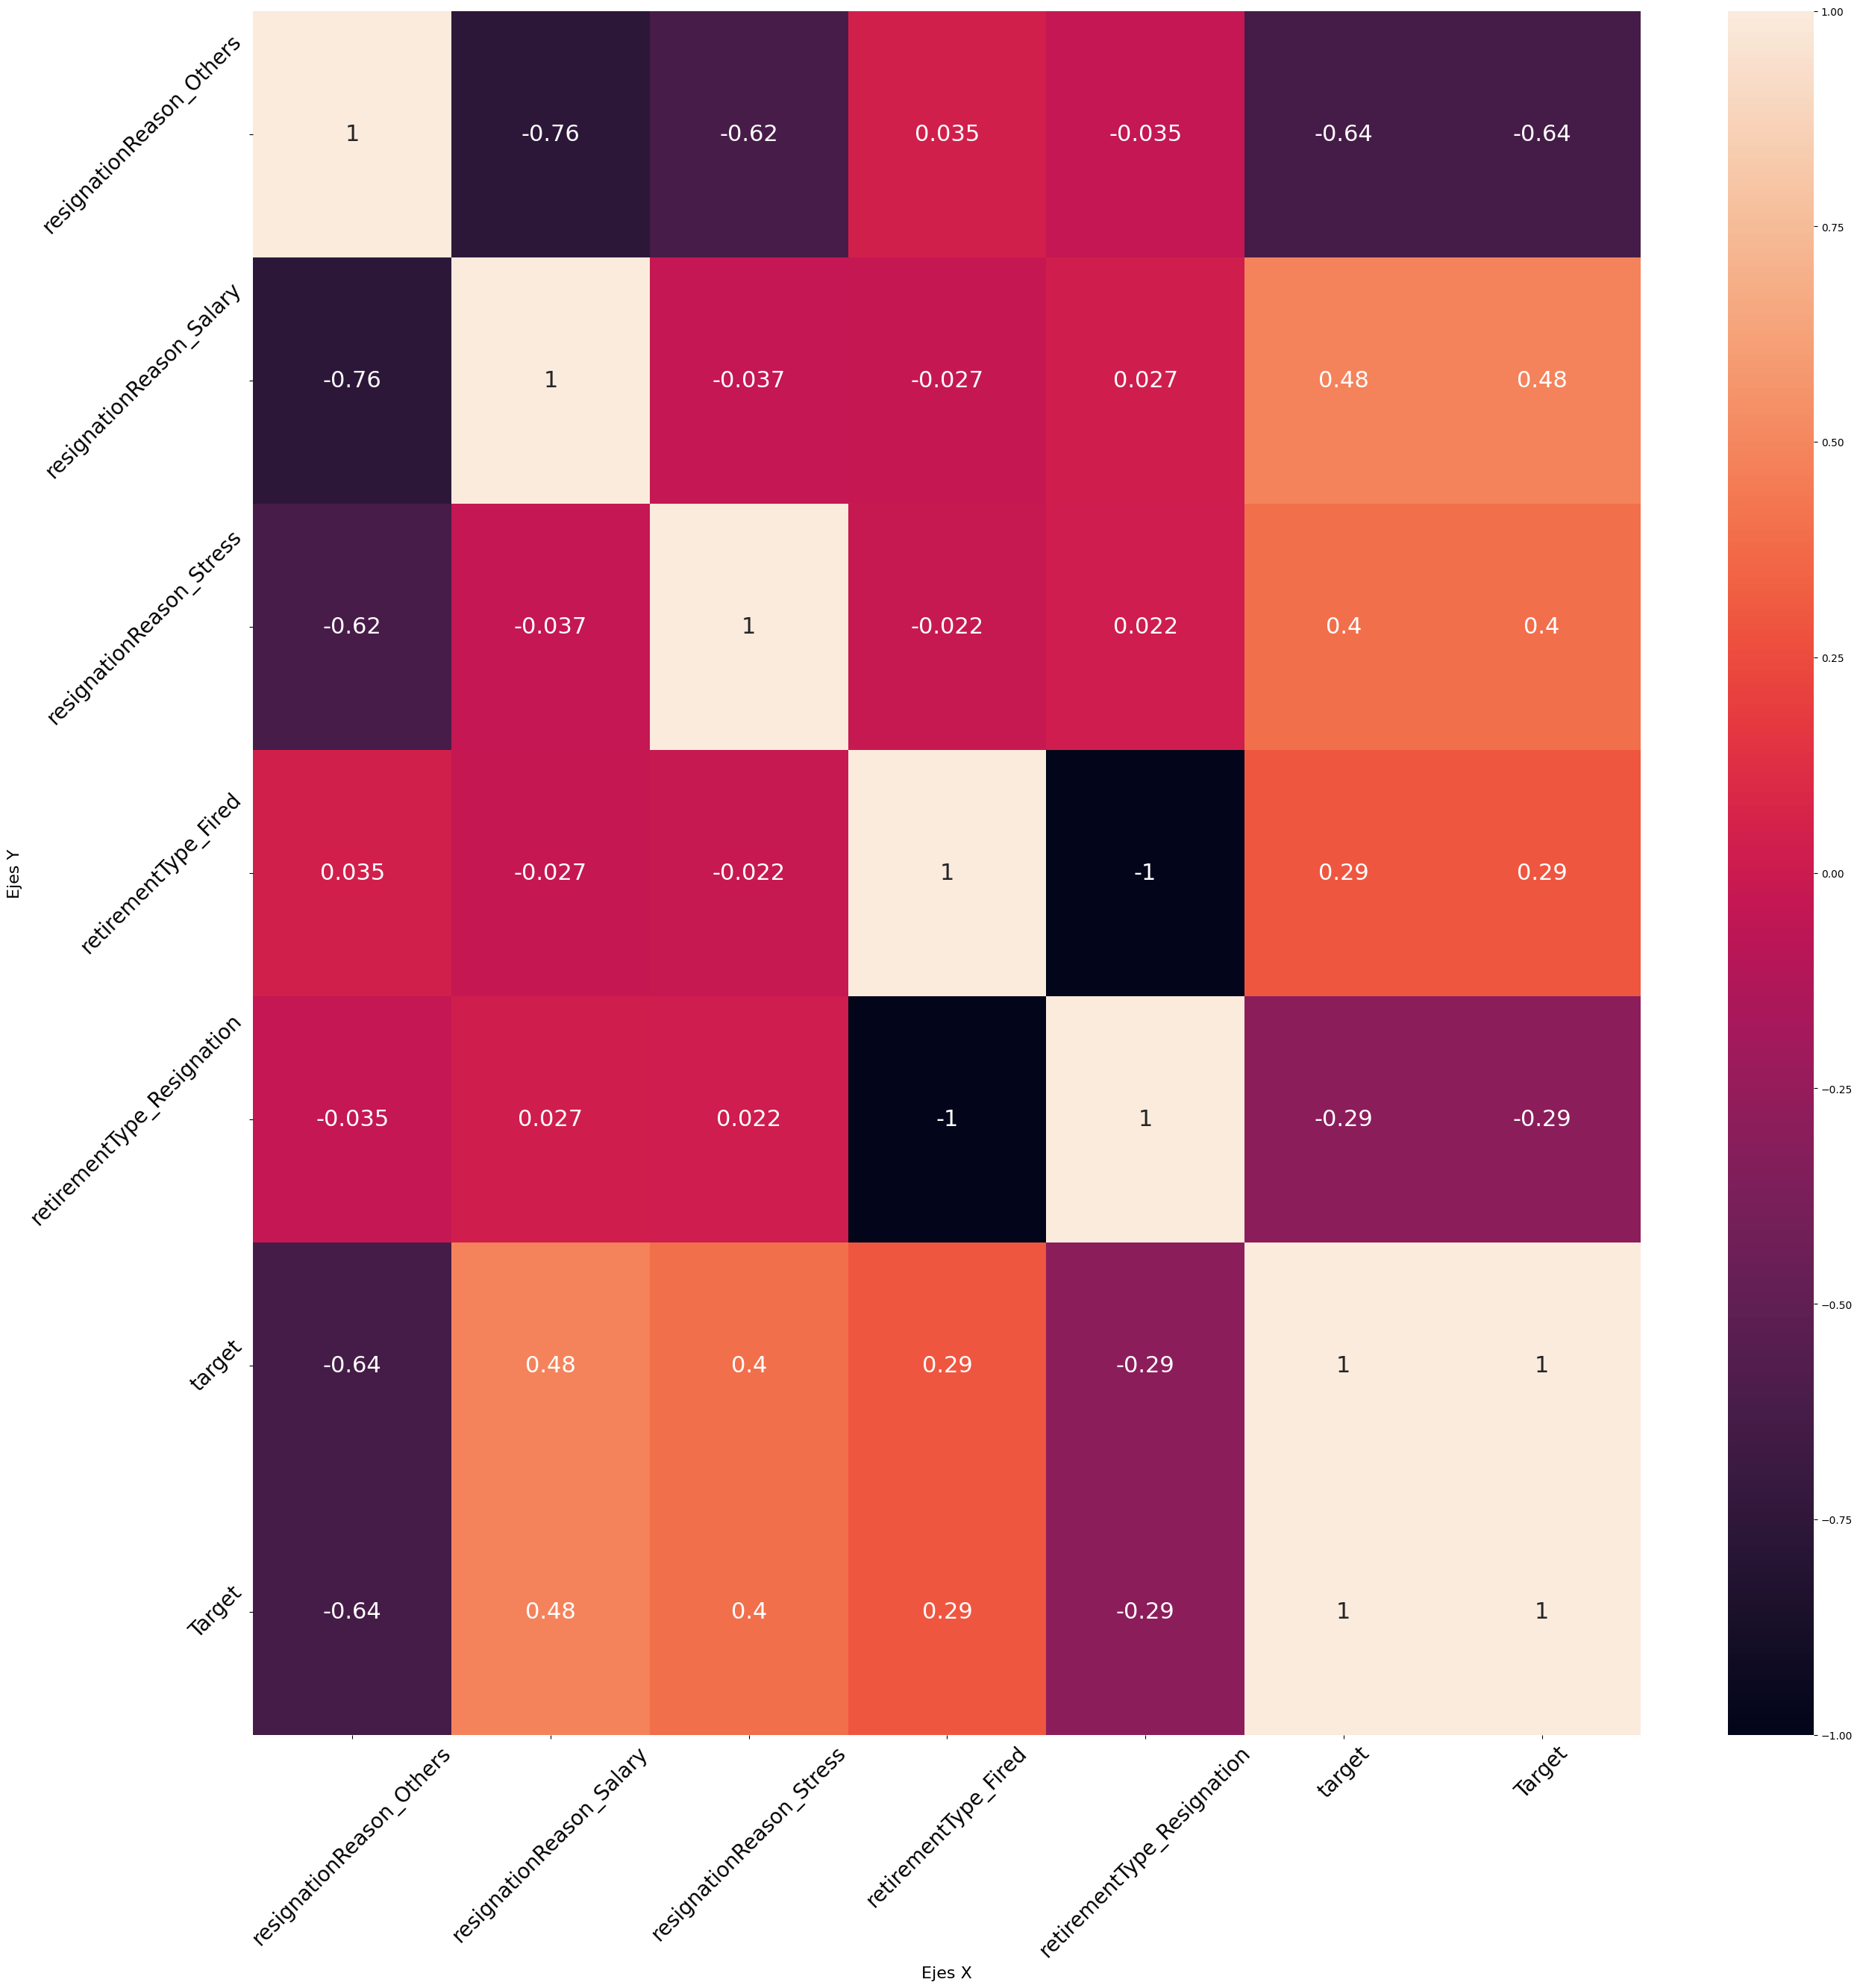

In [23]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = cat.iloc[:,60:67]
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

No se seleccionaron retirement_info, porque al imputado aproximadamente el 60% de las variables de esta base se estaria sesgando el modelo ya que tienen mucha similitud con la variable objetivo

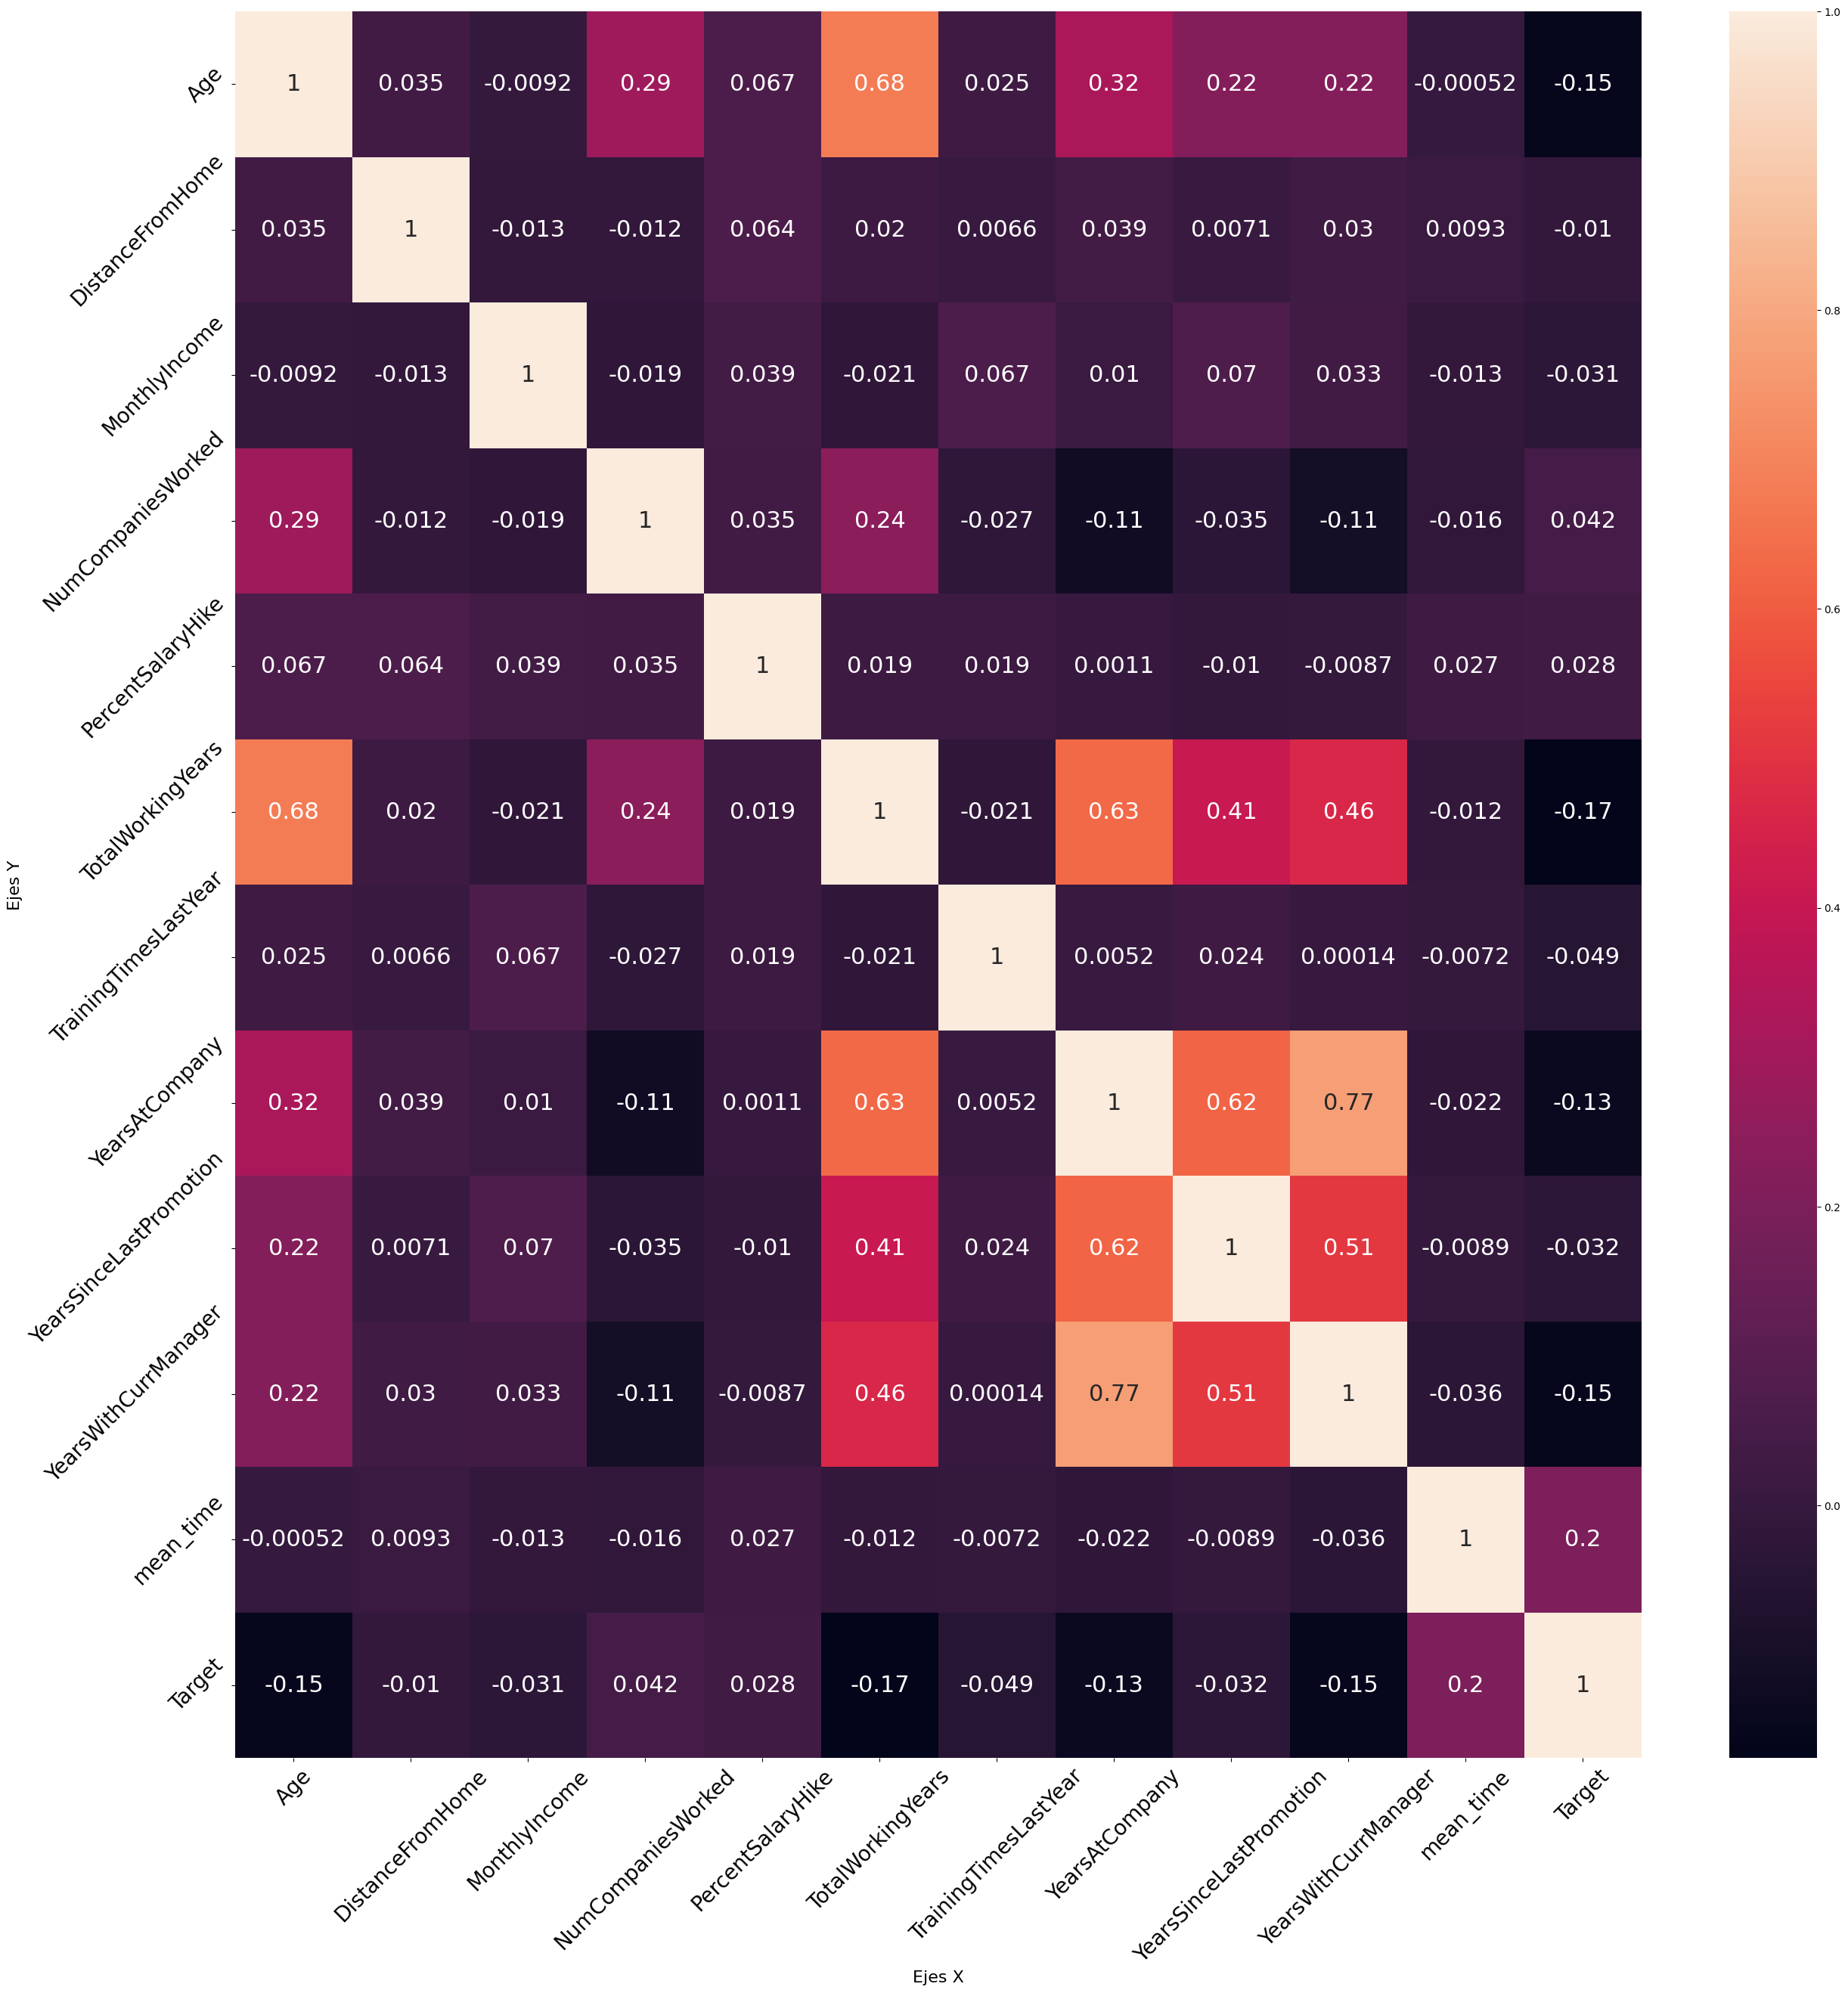

In [24]:
# Para interpretar mejor los resultados de la matriz de correlación, se decide dividir la matriz por variables
c1 = num
c1['Target'] = y
plt.figure(figsize=(30, 30))
sns.heatmap(c1.corr(), annot=True, annot_kws={"size": 22})

# Ajustar el tamaño de las leyendas y etiquetas de ejes
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Ejes X", fontsize=16)  # Ajusta el tamaño de las etiquetas X
plt.ylabel("Ejes Y", fontsize=16)  # Ajusta el tamaño de las etiquetas Y

plt.show()

In [25]:
#Lista variables numericas seleccionadas 
va_num_m2=num[['Age', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager','mean_time']]

In [26]:
#Lista variables categoricas seleccionadas 
va_cat_m2=cat[['JobSatisfaction_4.0', 'WorkLifeBalance_1.0','EnvironmentSatisfaction_1.0','JobSatisfaction_2.0','JobRole_Sales Executive','MaritalStatus_Divorced','MaritalStatus_Single','EducationField_Human Resources','BusinessTravel_Travel_Frequently','Department_Human Resources','BusinessTravel_Non-Travel']]

In [27]:
#Se juntan las variables independientes modelo 1
va_num_m2=va_num_m2.reset_index()
va_cat_m2=va_cat_m2.reset_index()
X_m2=pd.merge(va_num_m2, va_cat_m2,  how = 'inner', on = 'index')

In [28]:
X_m2.head()

index       Age  TotalWorkingYears  YearsAtCompany  YearsWithCurrManager  \
0      0  0.850000              0.025           0.025              0.000000   
1      1  0.516667              0.150           0.125              0.235294   
2      2  0.533333              0.125           0.125              0.176471   
3      3  0.633333              0.325           0.200              0.294118   
4      4  0.533333              0.225           0.150              0.235294   

   mean_time  JobSatisfaction_4.0  WorkLifeBalance_1.0  \
0   0.279528                    1                    0   
1   0.348425                    0                    0   
2   0.208661                    0                    1   
3   0.244094                    1                    0   
4   0.405512                    0                    0   

   EnvironmentSatisfaction_1.0  JobSatisfaction_2.0  JobRole_Sales Executive  \
0                            0                    0                        0   
1                            0                    1                        0   
2                            0                    1                        1   
3                            0                    0                        0   
4                            0                    0                        1   

   MaritalStatus_Divorced  MaritalStatus_Single  \
0                       0                     0   
1                       0                     1   
2                       0                     0   
3                       0                     0   
4                       0                     1   

   EducationField_Human Resources  BusinessTravel_Travel_Frequently  \
0                               0                                 0   
1                               0                                 1   
2                               0                                 1   
3                               0                                 0   
4                               0                                 0   

   Department_Human Resources  BusinessTravel_Non-Travel  
0                           0                          0  
1                           0                          0  
2                           0                          0  
3                           0                          1  
4                           0                          0

# <h1> Metodos anteriores combinados

In [29]:
#Se juntan las variables independientes modelo 1
cat_m3=cat.reset_index()
num_m3=num.reset_index()
X_m3=pd.merge(num_m3, cat_m3,  how = 'inner', on = 'index')
X_m3=X_m3.drop('index',axis=1)

In [30]:
X_m3=X_m3[['Age', 'JobInvolvement_2.0', 'EnvironmentSatisfaction_4.0', 'MaritalStatus_Single', 'Education_3.0', 'EducationField_Medical', 'DistanceFromHome', 'BusinessTravel_Travel_Frequently', 'EducationField_Life Sciences', 'WorkLifeBalance_3.0', 'mean_time', 'EnvironmentSatisfaction_1.0', 'JobSatisfaction_3.0', 'MaritalStatus_Divorced', 'JobSatisfaction_1.0', 'WorkLifeBalance_1.0', 'Department_Sales', 'JobSatisfaction_4.0', 'Department_Human Resources', 'Education_2.0', 'YearsWithCurrManager', 'Gender_Male', 'Gender_Female', 'EnvironmentSatisfaction_3.0', 'JobLevel_1.0', 'WorkLifeBalance_2.0', 'JobInvolvement_3.0', 'Education_4.0', 'JobLevel_2.0', 'JobRole_Research Scientist', 'NumCompaniesWorked', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'JobRole_Sales Executive', 'YearsAtCompany', 'BusinessTravel_Non-Travel', 'MaritalStatus_Married', 'TotalWorkingYears', 'StockOptionLevel_0.0', 'EducationField_Human Resources', 'StockOptionLevel_1.0', 'JobSatisfaction_2.0', 'MonthlyIncome', 'EnvironmentSatisfaction_2.0']]
X_m3.head()

Age  JobInvolvement_2.0  EnvironmentSatisfaction_4.0  \
0  0.850000                   0                            0   
1  0.516667                   1                            0   
2  0.533333                   0                            0   
3  0.633333                   1                            1   
4  0.533333                   0                            1   

   MaritalStatus_Single  Education_3.0  EducationField_Medical  \
0                     0              0                       0   
1                     1              0                       0   
2                     0              0                       0   
3                     0              0                       0   
4                     1              0                       1   

   DistanceFromHome  BusinessTravel_Travel_Frequently  \
0          0.206897                                 0   
1          0.344828                                 1   
2          0.586207                                 1   
3          0.068966                                 0   
4          0.344828                                 0   

   EducationField_Life Sciences  WorkLifeBalance_3.0  ...  YearsAtCompany  \
0                             1                    0  ...           0.025   
1                             1                    0  ...           0.125   
2                             0                    0  ...           0.125   
3                             1                    1  ...           0.200   
4                             0                    1  ...           0.150   

   BusinessTravel_Non-Travel  MaritalStatus_Married  TotalWorkingYears  \
0                          0                      1              0.025   
1                          0                      0              0.150   
2                          0                      1              0.125   
3                          1                      1              0.325   
4                          0                      0              0.225   

   StockOptionLevel_0.0  EducationField_Human Resources  StockOptionLevel_1.0  \
0                     1                               0                     0   
1                     0                               0                     1   
2                     0                               0                     0   
3                     0                               0                     0   
4                     0                               0                     0   

   JobSatisfaction_2.0  MonthlyIncome  EnvironmentSatisfaction_2.0  
0                    0       0.655833                            0  
1                    1       0.209460                            0  
2                    1       0.966448                            1  
3                    0       0.416071                            0  
4                    0       0.117106                            0  

[5 rows x 44 columns]

In [31]:
# Se exportaron los datos
X_m1.to_csv('Tablas\X_m1.csv', index=True)
X_m2.to_csv('Tablas\X_m2.csv', index=True)
X_m3.to_csv('Tablas\X_m3.csv', index=True)
